# Mount Google Drive
Mount Drive agar Google Collaboratory dapat mengakses Google Drive

In [1]:
from google.colab import drive
drive.mount('/content/gdrive') 

Mounted at /content/gdrive


#Import Package
Import Package yang akan digunakan

In [2]:
!pip install sastrawi
!pip install seaborn

     |████████████████████████████████| 209 kB 5.2 MB/s 


In [17]:
#Twitter API
import tweepy
from tweepy import OAuthHandler
import pandas as pd
#Preprocess
import re #Regular Expression
#Stemming
import numpy as np
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.naive_bayes import BernoulliNB
from tqdm import tqdm as tqdm
import operator


In [18]:
#Bernoulli Model
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sn

In [19]:
#Wordcloud
from wordcloud import WordCloud, STOPWORDS
from PIL import Image
import urllib
import requests

# Crawling Data
Crawling Data dengan metode dari Twitter

In [20]:
#Tweepy untuk crawling data dari twitter
import tweepy
from tweepy import OAuthHandler
import pandas as pd

In [21]:
#Twitter Account 1
ACCESS_TOKEN = "176615700-wSbCidGlmETeksC32gToqtOWNq2dUt0ctO78w3Jt"
ACCESS_TOKEN_SECRET = "gW8H3unFKSBNXIQYUEmeOZOPyR0y6QQZOSQslb971Zteo"
CONSUMER_KEY = "7j7ET0pEx2eWP1Cw49ATlfmPp"
CONSUMER_SECRET = "Qh1IKdxBmuvwQwcV1nxp9Yupvib5pKwWGc9BR2CTANBFLgI3kP"

In [22]:
#authentifikasi login ke API
auth = OAuthHandler(CONSUMER_KEY, CONSUMER_SECRET)
auth.set_access_token(ACCESS_TOKEN, ACCESS_TOKEN_SECRET)
api = tweepy.API(auth, wait_on_rate_limit=True)

In [ ]:
#Start Data Mining using Twitter API
tweet_fulltext = []
searchquery = 'omicron'
for tweets in tweepy.Cursor(api.search, q=searchquery, count=5000, lang='id', tweet_mode='extended').items():
  if tweets.full_text not in tweet_fulltext:
    tweet_fulltext.append(tweets.full_text)
df = pd.DataFrame()
df['hashtags'] = tweet_fulltext
print(df.shape)

In [23]:
def scraptweets(search_words, date_since, date_until, numTweets):
    # Membuat Kolom Untuk Di Export Ke Excel  
    db_tweets = pd.DataFrame(columns=[
                                      'username', 'acctdesc', 'location', 'following',
                                      'totaltweets', 'usercreatedts', 'tweetcreatedts',
                                      'retweetcount', 'text', 'hashtags', 'followers',
                                     ])
    # Melakukan Query Pencarian Data Tweet Sesuai Kata Kunci Dan Tanggal
    tweets = tweepy.Cursor(
                    api.search, q=search_words, lang="id", 
                    since=date_since, until=date_until,  tweet_mode='extended').items()
    # Merubah Kumpulan Item Hasil Tweet Menjadi Kumpulan Data Dalam Array List
    tweet_list = [tweet for tweet in tweets]
    # Melakukan Perulangan Untuk Data Tweet Untuk Dimasukkan Kedalam CSV
    for tweet in tweet_list:
        username = tweet.user.screen_name
        acctdesc = tweet.user.description
        location = tweet.user.location
        following = tweet.user.friends_count
        followers = tweet.user.followers_count
        totaltweets = tweet.user.statuses_count
        usercreatedts = tweet.user.created_at
        tweetcreatedts = tweet.created_at
        retweetcount = tweet.retweet_count
        hashtags = tweet.entities['hashtags']
        try:
            text = tweet.retweeted_status.full_text
        except AttributeError:
            text = tweet.full_text
        # Membuat Array Kumpulan Data Sesuai Kolom Dan Memasukkan Kedalam Array Data Tweet
        ith_tweet = [
                        username, acctdesc, location, following, followers, totaltweets,
                        usercreatedts, tweetcreatedts, retweetcount, text, hashtags
                    ]
        db_tweets.loc[len(db_tweets)] = ith_tweet
    # Export Data Kumpulan Tweet Ke File CSV
    print('Proses Scrapping Selesai Dengan Jumlah Data', len(db_tweets))
    filename = 'omicron.csv'
    db_tweets.to_csv(filename, index=False)
    print('Scraping has completed!')
# Format Pencarian Data Tweet
search_words = "omicron"
date_since = "2021-01-01"
date_until = "2022-02-01"
numTweets = 5000
scraptweets(search_words, date_since, date_until, numTweets)

TweepError: ignored

In [ ]:
#cek
df.head()

In [ ]:
#Load Raw Data Tweets from Google Drive
df = pd.read_csv('gdrive/My Drive/PPL/prakerja/prepro/prakerja_crawling.csv')
#df = pd.read_csv('prakerja_crawling.csv')

In [ ]:
#cek
df.head(2)

,username,acctdesc,location,following,totaltweets,usercreatedts,tweetcreatedts,retweetcount,text,hashtags,followers
0,yenlowchoi,i am me | #FCF695 #F3AA51,NaN,556,543,110237,2013-09-03 22:29:12,2021-09-27 07:04:43,0,@izonemfs kemarin dapet prakerja,[]
1,RoqiGrosir,penjualan grosir,"Bekasi, Jawa Barat",63,4,124,2017-01-15 16:28:42,2021-09-27 07:03:26,0,"@TokopediaCare Halo Kak,\nNama : Muhamad Surya...",[]


In [ ]:
#menghapus beberapa kolom dari data asli
df.drop(['username', 'acctdesc', 'location', 'following', 'totaltweets', 'usercreatedts', 'tweetcreatedts','retweetcount','text','followers'], axis=1, inplace=True)

In [ ]:
len(df)

2271

In [ ]:
#cek
df.head(5)

,hashtags
0,@izonemfs kemarin dapet prakerja
1,"@TokopediaCare Halo Kak,\nNama : Muhamad Surya..."
2,@Chepyzaenal68 Untuk melakukan pendaftaran aku...
3,@bukalapak the best lah bukalapak dan prakerja...
4,@bukalapak emang bukalapak paling bisa di anda...


In [ ]:
#Export dataframe consisting Raw Data Tweets to csv file and save it to Google Drive
#mencetak csv
df.to_csv('data_comut.csv')
!mv data_comut.csv /content/gdrive/My\ Drive/PPL/prakerja/datanew/data_comut.csv

# Pre Processing

In [ ]:
#panda penamaan singkat
import pandas as pd
import re

In [ ]:
#Load Raw Data Tweets 
#df = pd.read_csv('data_comut.csv', engine='python')
df = pd.read_csv('gdrive/My Drive/PPL/prakerja/datanew/data_comut.csv', engine='python')

##Case Folding

In [ ]:
#cek
df.head()

,Unnamed: 0,hashtags
0,0,@izonemfs kemarin dapet prakerja
1,1,"@TokopediaCare Halo Kak,\nNama : Muhamad Surya..."
2,2,@Chepyzaenal68 Untuk melakukan pendaftaran aku...
3,3,@bukalapak the best lah bukalapak dan prakerja...
4,4,@bukalapak emang bukalapak paling bisa di anda...


nyoba ini

In [ ]:
df['tweets']=df['hashtags'].str.replace('(https?://[\w\.\/]*)', '') #http
df['tweets']=df['tweets'].str.replace('(?:&(?:lt|nbsp|amp|gt);)', '') #lt,nbsp,gt,amp
df['tweets']=df['tweets'].str.replace('(@|#)\w+', '') #@ dan #
df['tweets']=df['tweets'].str.replace('[^A-Za-z0-9\s\-\/]', '') #selain huruf, spasi dan strip
df['tweets']=df['tweets'].str.replace('(\-|\/)', ' ') #-
df['tweets']=df['tweets'].str.replace('\n', ' ') # enter
df['tweets']=df['tweets'].str.replace('\s{2,}', ' ') # spasi lebih dari 2
df['tweets']=df['tweets'].str.replace('^rt.*', '') #Remove RT Tweets
df['tweets']=df['tweets'].str.replace("\.\.", " ")
df.dropna(subset=['tweets'], inplace=True) #Remove Empty cell
df = df.drop_duplicates() #Remove Duplicate Tweet

In [ ]:
#cek
df.head()

,Unnamed: 0,hashtags,tweets
0,0,@izonemfs kemarin dapet prakerja,kemarin dapet prakerja
1,1,"@TokopediaCare Halo Kak,\nNama : Muhamad Surya...",Halo Kak Nama Muhamad Suryadi syahdoa E mail ...
2,2,@Chepyzaenal68 Untuk melakukan pendaftaran aku...,Untuk melakukan pendaftaran akun kartu Praker...
3,3,@bukalapak the best lah bukalapak dan prakerja...,the best lah bukalapak dan prakerja dalam mem...
4,4,@bukalapak emang bukalapak paling bisa di anda...,emang bukalapak paling bisa di andalkan kalo ...


In [ ]:
!pip install sastrawi
import numpy as np
import pandas as pd
import re
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory
from tqdm import tqdm_notebook as tqdm

In [ ]:
stopword = StopWordRemoverFactory().create_stop_word_remover()
stemmer = StemmerFactory().create_stemmer()

In [ ]:
def stopwords(data):
  data = stopword.remove(data)
  return data

In [ ]:
#Function untuk membersihkan tweet yang telah di filter
def clean_text(data):
  data = re.sub(r'\bmalas\b', 'males', data)
  data = re.sub(r'\bgue\b|\bgua\b|\bw\b|\baku\b|\bku\b|\bgw\b|\beug\b|\bsy\b|\bacu\b', 'saya', data)
  data = re.sub(r'\bst\b|\bstsiun\b|\bsta\b', 'stasiun', data)
  data = re.sub(r'\bsmpe\b', 'sampai', data)
  data = re.sub(r'\bbpk\b', 'bapak', data)
  data = re.sub(r'\btks\b|\bthanks\b|\btengkyu\b', 'makasih', data)
  data = re.sub(r'\byg\b', 'yang', data)
  data = re.sub(r'\bjlr\b', 'jalur', data)
  data = re.sub(r'\bhuft\b', 'parah', data)
  data = re.sub(r'\bzonk\b', 'jelek', data)
  data = re.sub(r'\bpkl\b|\bpukul\b', '', data)
  data = re.sub(r'\bgua\b|\bgue\b|\bw\b|\bgw\b', 'saya', data)
  data = re.sub(r'\bselamat\b', '', data)
  data = re.sub(r'\bmakasih\b', '', data)
  data = re.sub(r'\byg\b', 'yang', data)
  data = re.sub(r'\bmandek\b', 'ketahan', data)
  data = re.sub(r'\bzonk\b', 'jelek', data)
  data = re.sub(r'\bga\b|\bgak\b|\bengga\b', 'enggak', data)
  data = re.sub(r'\bpeople\b', 'orang', data)
  data = re.sub(r'\bnjir\b', 'anjing', data)
  data = re.sub(r'\bDDT\b|\bddt\b', 'double double track', data)
  data = re.sub(r'\bkzl\b|\bkesal\b', 'kesel', data)
  data = data.split()
  data = ' '.join(data)
 
  data = stopword.remove(data)
  data = stemmer.stem(data)
  return data

In [ ]:
#Menyimpan tweet yang telah dibersihkan ke dataframe df dan disimpan pada kolom 'clean_text'
df['stopwords'] = [stopwords(n) for n in tqdm(df.tweets)]
df['clean_text'] = [clean_text(n) for n in tqdm(df.tweets)]

not_null_row = [i for i in df.index if len(df.loc[i]['clean_text']) > 0]
df = df.loc[not_null_row]
# print(df.shape)
df.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  


  0%|          | 0/2271 [00:00<?, ?it/s]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  This is separate from the ipykernel package so we can avoid doing imports until


  0%|          | 0/2271 [00:00<?, ?it/s]

,Unnamed: 0,hashtags,tweets,stopwords,clean_text
0,0,@izonemfs kemarin dapet prakerja,kemarin dapet prakerja,kemarin dapet prakerja,kemarin dapet prakerja
1,1,"@TokopediaCare Halo Kak,\nNama : Muhamad Surya...",Halo Kak Nama Muhamad Suryadi syahdoa E mail ...,Halo Kak Nama Muhamad Suryadi syahdoa E mail ...,halo kak nama muhamad suryadi syahdoa e mail a...
2,2,@Chepyzaenal68 Untuk melakukan pendaftaran aku...,Untuk melakukan pendaftaran akun kartu Praker...,Untuk melakukan pendaftaran akun kartu Praker...,untuk laku daftar akun kartu prakerja sila kun...
3,3,@bukalapak the best lah bukalapak dan prakerja...,the best lah bukalapak dan prakerja dalam mem...,the best lah bukalapak prakerja membantu masy...,the best lah bukalapak prakerja bantu masyarakat
4,4,@bukalapak emang bukalapak paling bisa di anda...,emang bukalapak paling bisa di andalkan kalo ...,emang bukalapak paling andalkan kalo masalah ...,emang bukalapak paling andal kalo masalah tamb...


In [ ]:
import operator
import matplotlib.pyplot as plt

In [ ]:
words = {}

In [ ]:
batch = 500
for per_batch in range(len(df)//500):
  for word in ' '.join(df.iloc[batch * per_batch : batch * per_batch + batch].clean_text).split(' '):
    if word not in words.keys():
      words[word] = 1
    else:
      words[word] += 1

In [ ]:
sorted_words = sorted(words.items(), key=operator.itemgetter(1))

In [ ]:
top20_word =pd.DataFrame(sorted_words[len(sorted_words)-20:len(sorted_words)], columns =["Kata", "Jumlah"])
top20_word.head(20)

,Kata,Jumlah
0,pulsa,149
1,ini,150
2,dapat,153
3,kamu,161
4,skill,169
5,cara,169
6,program,217
7,mau,218
8,bukalapak,234
9,beli,239


In [ ]:
sorted_words = sorted(words.items(), key=operator.itemgetter(1))

selesai nyoba

In [ ]:
#membentuk data kolom hashtags menjadi string
for i in range(len(df)):
    if type(df["hashtags"][i]) != str:
        print(str(i), "Bukan string")
        
# Sudah dalam bentuk string semua

In [ ]:
#cek
df.head(5)

,Unnamed: 0,hashtags
0,0,@izonemfs kemarin dapet prakerja
1,1,"@TokopediaCare Halo Kak,\nNama : Muhamad Surya..."
2,2,@Chepyzaenal68 Untuk melakukan pendaftaran aku...
3,3,@bukalapak the best lah bukalapak dan prakerja...
4,4,@bukalapak emang bukalapak paling bisa di anda...


In [ ]:
#mengubah huruf kapital dalam data menjadi huruf kecil
df['lower']=df['hashtags'].str.lower()
df.head(5)

,Unnamed: 0,hashtags,lower
0,0,@izonemfs kemarin dapet prakerja,@izonemfs kemarin dapet prakerja
1,1,"@TokopediaCare Halo Kak,\nNama : Muhamad Surya...","@tokopediacare halo kak,\nnama : muhamad surya..."
2,2,@Chepyzaenal68 Untuk melakukan pendaftaran aku...,@chepyzaenal68 untuk melakukan pendaftaran aku...
3,3,@bukalapak the best lah bukalapak dan prakerja...,@bukalapak the best lah bukalapak dan prakerja...
4,4,@bukalapak emang bukalapak paling bisa di anda...,@bukalapak emang bukalapak paling bisa di anda...


In [ ]:
#Save Casefolded tweets in Google Drive as csv file.
df.to_csv('casefolding_tweets.csv', index=None)
!mv casefolding_tweets.csv /content/gdrive/My\ Drive/PPL/prakerja/datanew/casefolding_tweets.csv

##Filtering


In [ ]:
df['filter_txt']=df['lower'].str.replace('(@|#)\w+', ' ') #menghapus @ dan #

df['filter_txt']=df['filter_txt'].str.replace('(https?://[\w\.\/]*)', ' ') #menghapus semua karakter bersifat url http
df['filter_txt']=df['filter_txt'].str.replace('http\S+', ' ') #menghapus semua karakter bersifat url https

df['filter_txt']=df['filter_txt'].str.replace('\n', ' ') #menghapus ENTER 
df['filter_txt']=df['filter_txt'].str.replace('\t', ' ') #menghapus kartu
#df['filter_txt']=df['filter_txt'].str.replace('\u', ' ') # menghapus enter
df['filter_txt']=df['filter_txt'].str.replace('\d+', ' ') #menghapus angka

df['filter_txt']=df['filter_txt'].str.replace('(?:&(?:lt|nbsp|amp|gt);)', ' ') #menghapus lt,nbsp,gt,amp
df['filter_txt']=df['filter_txt'].str.replace('[^A-Za-z0-9\s\-\/]', ' ') #menghapus selain huruf, spasi dan strip
df['filter_txt']=df['filter_txt'].str.replace('(\-|\/)', ' ') #menghapus -
df['filter_txt']=df['filter_txt'].str.replace('\.\.', ' ') #menghapus .
df['filter_txt']=df['filter_txt'].str.replace('^rt.*', ' ') #Remove RT Tweets
df['filter_txt']=df['filter_txt'].str.replace('<.*?>', ' ') #menghapus karakter html
df['filter_txt']=df['filter_txt'].str.replace('prakerja', ' ') #menghapus kata prakerja
#df['filter_txt']=df['filter_txt'].str.replace('\s+', ' ') #mengganti spasi > 1 dengan 1 spasi
df['filter_txt']=df['filter_txt'].str.replace('\s{2,}', ' ') #menghapus spasi lebih dari 2

df['filter_txt']=df['filter_txt'].str.replace('\b[a-zA-Z]\b', ' ') #menghapus huruf mandiri
df.dropna(subset=['filter_txt'], inplace=True) #menghapus cell kosong
df = df.drop_duplicates() #menghapus duplikat tweet
df.head(5) #menampilkan data

,Unnamed: 0,hashtags,lower,filter_txt
0,0,@izonemfs kemarin dapet prakerja,@izonemfs kemarin dapet prakerja,kemarin dapet
1,1,"@TokopediaCare Halo Kak,\nNama : Muhamad Surya...","@tokopediacare halo kak,\nnama : muhamad surya...",halo kak nama muhamad suryadi syahdoa e mail ...
2,2,@Chepyzaenal68 Untuk melakukan pendaftaran aku...,@chepyzaenal68 untuk melakukan pendaftaran aku...,untuk melakukan pendaftaran akun kartu silaka...
3,3,@bukalapak the best lah bukalapak dan prakerja...,@bukalapak the best lah bukalapak dan prakerja...,the best lah bukalapak dan dalam membantu mas...
4,4,@bukalapak emang bukalapak paling bisa di anda...,@bukalapak emang bukalapak paling bisa di anda...,emang bukalapak paling bisa di andalkan kalo ...


In [ ]:
import string 
import re #regex library
import nltk

def remove_tweet_special(text):
    # hapus tab, baris baru, dan irisan belakang
    text = text.replace('\\t'," ").replace('\\n'," ").replace('\\u'," ").replace('\\',"")
    # hapus non ASCII (emotikon, kata cina, .etc)
    text = text.encode('ascii', 'replace').decode('ascii')
    # hapus sebutan, tautan, tagar
    text = ' '.join(re.sub("([@#][A-Za-z0-9]+)|(\w+:\/\/\S+)"," ", text).split())
    # hapus URL yang tidak lengkap
    return text.replace("http://", " ").replace("https://", " ")
                
df['filter_kedua'] = df['lower'].apply(remove_tweet_special)

#menghapus angka
def remove_number(text):
    return  re.sub(r"\d+", " ", text)

df['filter_kedua'] = df['filter_kedua'].apply(remove_number)

#hilangkan tanda baca
def remove_punctuation(text):
    return text.translate(str.maketrans(""," ",string.punctuation))

df['filter_kedua'] = df['filter_kedua'].apply(remove_punctuation)

#hapus spasi di awal & akhir
def remove_whitespace_LT(text):
    return text.strip()

df['filter_kedua'] = df['filter_kedua'].apply(remove_whitespace_LT)

#hapus beberapa spasi putih menjadi spasi tunggal
def remove_whitespace_multiple(text):
    return re.sub('\s+',' ',text)

df['filter_kedua'] = df['filter_kedua'].apply(remove_whitespace_multiple)

# hapus satu karakter
def remove_singl_char(text):
    return re.sub(r"\b[a-zA-Z]\b", " ", text)

df.dropna(subset=['filter_kedua'], inplace=True) #menghapus cell kosong
df = df.drop_duplicates() #menghapus duplikat tweet

df['filter_kedua'] = df['filter_kedua'].apply(remove_singl_char)


In [ ]:
df.head(5)

,Unnamed: 0,hashtags,lower,filter_txt
0,0,@izonemfs kemarin dapet prakerja,@izonemfs kemarin dapet prakerja,kemarin dapet
1,1,"@TokopediaCare Halo Kak,\nNama : Muhamad Surya...","@tokopediacare halo kak,\nnama : muhamad surya...",halo kak nama muhamad suryadi syahdoa e mail ...
2,2,@Chepyzaenal68 Untuk melakukan pendaftaran aku...,@chepyzaenal68 untuk melakukan pendaftaran aku...,untuk melakukan pendaftaran akun kartu silaka...
3,3,@bukalapak the best lah bukalapak dan prakerja...,@bukalapak the best lah bukalapak dan prakerja...,the best lah bukalapak dan dalam membantu mas...
4,4,@bukalapak emang bukalapak paling bisa di anda...,@bukalapak emang bukalapak paling bisa di anda...,emang bukalapak paling bisa di andalkan kalo ...


In [ ]:
#Save Filtered tweets in Google Drive as csv file.
df.to_csv('filtering_tweets.csv', index=None)
!mv filtering_tweets.csv /content/gdrive/My\ Drive/PPL/prakerja/datanew/filtering_tweets.csv

In [ ]:
from nltk.corpus import stopwords
import nltk
nltk.download('stopwords')
# ----------------------- dapatkan stopword dari stopword NLTK -------------------------------
# dapatkan stopword indonesia
list_stopwords = stopwords.words('indonesian')
print(len(list_stopwords))

# ---------------------------- tambahkan stopword secara manual  ------------------------------------
# tambahkan stopword tambahan
list_stopwords.extend(['yg', 'dg', 'rt', 'dgn', 'ny', 'klo', 
                       'kalo', 'amp', 'biar', 'bikin', 'bilang', 
                       'gak', 'ga', 'krn', 'nya', 'nih', 'sih', 
                       'sih', 'tau', 'tdk', 'tuh', 'utk', 'ya',
                       'jd', 'jgn', 'sdh', 'aja', 'tp','mmg',
                       'nyg', 'hehe', 'pen', 'nan', 'loh', 'nah',
                       'yah','co','ya','aja','the', 'best'])
len(list_stopwords)
# ----------------------- tambahkan stopword dari file txt ------------------------------------
# baca txt stopword menggunakan panda
txt_stopword = pd.read_csv("gdrive/My Drive/PPL/prakerja/ID-Stopwords-master/id.stopwords.02.01.2016.txt", names= ["stopwords"], header = None)

# konversi string stopword ke daftar dan tambahkan stopword tambahan
list_stopwords.extend(txt_stopword["stopwords"][0].split(' '))
len(list_stopwords)
# ---------------------------------------------------------------------------------------

# konversi daftar ke kamus
list_stopwords = set(list_stopwords)

#hapus stopword pada token daftar
def stopwords_removal(words):
    return [word for word in words if word not in list_stopwords]

df['clean_stop'] = df['filter_txt'].apply(stopwords_removal) 
df.head(5)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
758


,Unnamed: 0,hashtags,lower,filter_txt,clean_stop
0,0,@izonemfs kemarin dapet prakerja,@izonemfs kemarin dapet prakerja,kemarin dapet,"[ , k, e, m, a, r, i, n, , d, a, p, e, t, ]"
1,1,"@TokopediaCare Halo Kak,\nNama : Muhamad Surya...","@tokopediacare halo kak,\nnama : muhamad surya...",halo kak nama muhamad suryadi syahdoa e mail ...,"[ , h, a, l, o, , k, a, k, , n, a, m, a, , ..."
2,2,@Chepyzaenal68 Untuk melakukan pendaftaran aku...,@chepyzaenal68 untuk melakukan pendaftaran aku...,untuk melakukan pendaftaran akun kartu silaka...,"[ , u, n, t, u, k, , m, e, l, a, k, u, k, a, ..."
3,3,@bukalapak the best lah bukalapak dan prakerja...,@bukalapak the best lah bukalapak dan prakerja...,the best lah bukalapak dan dalam membantu mas...,"[ , t, h, e, , b, e, s, t, , l, a, h, , b, ..."
4,4,@bukalapak emang bukalapak paling bisa di anda...,@bukalapak emang bukalapak paling bisa di anda...,emang bukalapak paling bisa di andalkan kalo ...,"[ , e, m, a, n, g, , b, u, k, a, l, a, p, a, ..."


In [ ]:
import string 
import re #regex library
import nltk
nltk.download('punkt')
# impor word_tokenize & FreqDist dari NLTK
from nltk.tokenize import word_tokenize 
from nltk.probability import FreqDist

# ------ Tokenizing ---------

# NLTK kata tokenize
def word_tokenize_wrapper(text):
    return word_tokenize(text)

df['token'] = df['filter_txt'].apply(word_tokenize_wrapper)

print('Tokenizing Result : \n') 
df.head()

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
Tokenizing Result : 



,Unnamed: 0,hashtags,lower,filter_txt,token
0,0,@izonemfs kemarin dapet prakerja,@izonemfs kemarin dapet prakerja,kemarin dapet,"[kemarin, dapet]"
1,1,"@TokopediaCare Halo Kak,\nNama : Muhamad Surya...","@tokopediacare halo kak,\nnama : muhamad surya...",halo kak nama muhamad suryadi syahdoa e mail ...,"[halo, kak, nama, muhamad, suryadi, syahdoa, e..."
2,2,@Chepyzaenal68 Untuk melakukan pendaftaran aku...,@chepyzaenal68 untuk melakukan pendaftaran aku...,untuk melakukan pendaftaran akun kartu silaka...,"[untuk, melakukan, pendaftaran, akun, kartu, s..."
3,3,@bukalapak the best lah bukalapak dan prakerja...,@bukalapak the best lah bukalapak dan prakerja...,the best lah bukalapak dan dalam membantu mas...,"[the, best, lah, bukalapak, dan, dalam, memban..."
4,4,@bukalapak emang bukalapak paling bisa di anda...,@bukalapak emang bukalapak paling bisa di anda...,emang bukalapak paling bisa di andalkan kalo ...,"[emang, bukalapak, paling, bisa, di, andalkan,..."


In [ ]:
#Save Filtered tweets in Google Drive as csv file.
df.to_csv('token_tweets.csv', index=None)
!mv token_tweets.csv /content/gdrive/My\ Drive/PPL/prakerja/datanew/token_tweets.csv

## Stopword dan Stemming using Sastrawi

In [ ]:
from nltk.corpus import stopwords
import nltk
nltk.download('stopwords')
# ----------------------- dapatkan stopword dari stopword NLTK -------------------------------
# dapatkan stopword indonesia
list_stopwords = stopwords.words('indonesian')
print(len(list_stopwords))

# ---------------------------- tambahkan stopword secara manual  ------------------------------------
# tambahkan stopword tambahan
list_stopwords.extend(['yg', 'dg', 'rt', 'dgn', 'ny', 'klo', 
                       'kalo', 'amp', 'biar', 'bikin', 'bilang', 
                       'gak', 'ga', 'krn', 'nya', 'nih', 'sih', 
                       'sih', 'tau', 'tdk', 'tuh', 'utk', 'ya',
                       'jd', 'jgn', 'sdh', 'aja', 'tp','mmg',
                       'nyg', 'hehe', 'pen', 'nan', 'loh', 'nah',
                       'yah','co','ya','aja','the', 'best'])
len(list_stopwords)
# ----------------------- tambahkan stopword dari file txt ------------------------------------
# baca txt stopword menggunakan panda
txt_stopword = pd.read_csv("gdrive/My Drive/PPL/prakerja/ID-Stopwords-master/id.stopwords.02.01.2016.txt", names= ["stopwords"], header = None)

# konversi string stopword ke daftar dan tambahkan stopword tambahan
list_stopwords.extend(txt_stopword["stopwords"][0].split(' '))
len(list_stopwords)
# ---------------------------------------------------------------------------------------

# konversi daftar ke kamus
list_stopwords = set(list_stopwords)

#hapus stopword pada token daftar
def stopwords_removal(words):
    return [word for word in words if word not in list_stopwords]

df['clean_stop'] = df['token'].apply(stopwords_removal) 
df.head(5)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
758


,Unnamed: 0,hashtags,lower,filter_txt,token,clean_stop
0,0,@izonemfs kemarin dapet prakerja,@izonemfs kemarin dapet prakerja,kemarin dapet,"[kemarin, dapet]","[kemarin, dapet]"
1,1,"@TokopediaCare Halo Kak,\nNama : Muhamad Surya...","@tokopediacare halo kak,\nnama : muhamad surya...",halo kak nama muhamad suryadi syahdoa e mail ...,"[halo, kak, nama, muhamad, suryadi, syahdoa, e...","[halo, kak, nama, muhamad, suryadi, syahdoa, e..."
2,2,@Chepyzaenal68 Untuk melakukan pendaftaran aku...,@chepyzaenal68 untuk melakukan pendaftaran aku...,untuk melakukan pendaftaran akun kartu silaka...,"[untuk, melakukan, pendaftaran, akun, kartu, s...","[pendaftaran, akun, kartu, silakan, kunjungi, ..."
3,3,@bukalapak the best lah bukalapak dan prakerja...,@bukalapak the best lah bukalapak dan prakerja...,the best lah bukalapak dan dalam membantu mas...,"[the, best, lah, bukalapak, dan, dalam, memban...","[bukalapak, membantu, masyarakat]"
4,4,@bukalapak emang bukalapak paling bisa di anda...,@bukalapak emang bukalapak paling bisa di anda...,emang bukalapak paling bisa di andalkan kalo ...,"[emang, bukalapak, paling, bisa, di, andalkan,...","[emang, bukalapak, andalkan, penambahan, ilmu,..."


In [ ]:
# Menghitung Distribusi frekuensi NLTK
def freqDist_wrapper(text):
    return FreqDist(text)

df['freq_dist_token'] = df['clean_stop'].apply(freqDist_wrapper)

print('Frequency Tokens : \n') 
print(df['freq_dist_token'].head().apply(lambda x : x.most_common()))
df.head()

Frequency Tokens : 

0                           [(kemarin, 1), (dapet, 1)]
1    [(halo, 1), (kak, 1), (nama, 1), (muhamad, 1),...
2    [(akun, 2), (pendaftaran, 1), (kartu, 1), (sil...
3     [(bukalapak, 1), (membantu, 1), (masyarakat, 1)]
4    [(emang, 1), (bukalapak, 1), (andalkan, 1), (p...
Name: freq_dist_token, dtype: object


,Unnamed: 0,hashtags,lower,filter_txt,token,clean_stop,freq_dist_token
0,0,@izonemfs kemarin dapet prakerja,@izonemfs kemarin dapet prakerja,kemarin dapet,"[kemarin, dapet]","[kemarin, dapet]","{'kemarin': 1, 'dapet': 1}"
1,1,"@TokopediaCare Halo Kak,\nNama : Muhamad Surya...","@tokopediacare halo kak,\nnama : muhamad surya...",halo kak nama muhamad suryadi syahdoa e mail ...,"[halo, kak, nama, muhamad, suryadi, syahdoa, e...","[halo, kak, nama, muhamad, suryadi, syahdoa, e...","{'halo': 1, 'kak': 1, 'nama': 1, 'muhamad': 1,..."
2,2,@Chepyzaenal68 Untuk melakukan pendaftaran aku...,@chepyzaenal68 untuk melakukan pendaftaran aku...,untuk melakukan pendaftaran akun kartu silaka...,"[untuk, melakukan, pendaftaran, akun, kartu, s...","[pendaftaran, akun, kartu, silakan, kunjungi, ...","{'pendaftaran': 1, 'akun': 2, 'kartu': 1, 'sil..."
3,3,@bukalapak the best lah bukalapak dan prakerja...,@bukalapak the best lah bukalapak dan prakerja...,the best lah bukalapak dan dalam membantu mas...,"[the, best, lah, bukalapak, dan, dalam, memban...","[bukalapak, membantu, masyarakat]","{'bukalapak': 1, 'membantu': 1, 'masyarakat': 1}"
4,4,@bukalapak emang bukalapak paling bisa di anda...,@bukalapak emang bukalapak paling bisa di anda...,emang bukalapak paling bisa di andalkan kalo ...,"[emang, bukalapak, paling, bisa, di, andalkan,...","[emang, bukalapak, andalkan, penambahan, ilmu,...","{'emang': 1, 'bukalapak': 1, 'andalkan': 1, 'p..."


In [ ]:
#import paket Sastrawi
!pip install Sastrawi
!pip install swifter
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
import swifter
#buat stemmer
factory = StemmerFactory()
stemmer = factory.create_stemmer()

# stemmer
def stemmed_wrapper(term):
    return stemmer.stem(term)

term_dict = {}

for document in df['clean_stop']:
    for term in document:
        if term not in term_dict:
            term_dict[term] = ' '
            
print(len(term_dict))
print("------------------------")

for term in term_dict:
    term_dict[term] = stemmed_wrapper(term)
    print(term,":",term_dict[term])
    
print(term_dict)
print("------------------------")


# terapkan istilah bertangkai ke kerangka data
def get_stemmed_term(document):
    return [term_dict[term] for term in document]

df['stemm'] = df['clean_stop'].swifter.apply(get_stemmed_term)
print(df.head())

3765
------------------------
kemarin : kemarin
dapet : dapet
halo : halo
kak : kak
nama : nama
muhamad : muhamad
suryadi : suryadi
syahdoa : syahdoa
e : e
mail : mail
addiefals : addiefals
com : com
kode : kode
voucher : voucher
blj : blj
f : f
ygid : ygid
pembelian : beli
cakap : cakap
mohon : mohon
update : update
dashboard : dashboard
pendaftaran : daftar
akun : akun
kartu : kartu
silakan : sila
kunjungi : kunjung
website : website
panduannya : pandu
instagram : instagram
go : go
id : id
bukalapak : bukalapak
membantu : bantu
masyarakat : masyarakat
emang : emang
andalkan : andal
penambahan : tambah
ilmu : ilmu
pelataihan : pelataihan
nyelesein : nyelesein
pelatihan : latih
pengin : pengin
ikutin : ikutin
etapi : etapi
saldonya : saldo
jt : jt
harga : harga
pelatihannya : latih
mahal : mahal
hai : hai
kakkk : kakkk
cek : cek
dm : dm
nambah : nambah
skill : skill
kerja : kerja
platihan : platihan
daftar : daftar
diblokir : blokir
bingung : bingung
ngambil : ngambil
kelas : kelas
nye

Pandas Apply:   0%|          | 0/2271 [00:00<?, ?it/s]

   Unnamed: 0  ...                                              stemm
0           0  ...                                   [kemarin, dapet]
1           1  ...  [halo, kak, nama, muhamad, suryadi, syahdoa, e...
2           2  ...  [daftar, akun, kartu, sila, kunjung, website, ...
3           3  ...                     [bukalapak, bantu, masyarakat]
4           4  ...  [emang, bukalapak, andal, tambah, ilmu, pelata...

[5 rows x 8 columns]


In [ ]:
#Save Filtered tweets in Google Drive as csv file.
df.to_csv('stop_stemmed_tweets.csv', index=None)
!mv stop_stemmed_tweets.csv /content/gdrive/My\ Drive/PPL/prakerja/datanew/stop_stemmed_tweets.csv

# Most word in dataset

In [ ]:
#Muat Tweet Data Mentah
#df = pd.read_csv('stop_stemmed_tweets.csv')
df = pd.read_csv('gdrive/My Drive/PPL/prakerja/datanew/stop_stemmed_tweets.csv')

In [ ]:
def rejoin_words(tokenized_column):
    return ( "".join(tokenized_column))
df['stemm_join'] = df.apply(lambda x: rejoin_words(x['stemm']), axis=1)
df.head(5)

,Unnamed: 0,hashtags,lower,filter_txt,token,clean_stop,freq_dist_token,stemm,stemm_join
0,0,@izonemfs kemarin dapet prakerja,@izonemfs kemarin dapet prakerja,kemarin dapet,"['kemarin', 'dapet']","['kemarin', 'dapet']",<FreqDist with 2 samples and 2 outcomes>,"['kemarin', 'dapet']","['kemarin', 'dapet']"
1,1,"@TokopediaCare Halo Kak,\nNama : Muhamad Surya...","@tokopediacare halo kak,\nnama : muhamad surya...",halo kak nama muhamad suryadi syahdoa e mail ...,"['halo', 'kak', 'nama', 'muhamad', 'suryadi', ...","['halo', 'kak', 'nama', 'muhamad', 'suryadi', ...",<FreqDist with 20 samples and 20 outcomes>,"['halo', 'kak', 'nama', 'muhamad', 'suryadi', ...","['halo', 'kak', 'nama', 'muhamad', 'suryadi', ..."
2,2,@Chepyzaenal68 Untuk melakukan pendaftaran aku...,@chepyzaenal68 untuk melakukan pendaftaran aku...,untuk melakukan pendaftaran akun kartu silaka...,"['untuk', 'melakukan', 'pendaftaran', 'akun', ...","['pendaftaran', 'akun', 'kartu', 'silakan', 'k...",<FreqDist with 10 samples and 11 outcomes>,"['daftar', 'akun', 'kartu', 'sila', 'kunjung',...","['daftar', 'akun', 'kartu', 'sila', 'kunjung',..."
3,3,@bukalapak the best lah bukalapak dan prakerja...,@bukalapak the best lah bukalapak dan prakerja...,the best lah bukalapak dan dalam membantu mas...,"['the', 'best', 'lah', 'bukalapak', 'dan', 'da...","['bukalapak', 'membantu', 'masyarakat']",<FreqDist with 3 samples and 3 outcomes>,"['bukalapak', 'bantu', 'masyarakat']","['bukalapak', 'bantu', 'masyarakat']"
4,4,@bukalapak emang bukalapak paling bisa di anda...,@bukalapak emang bukalapak paling bisa di anda...,emang bukalapak paling bisa di andalkan kalo ...,"['emang', 'bukalapak', 'paling', 'bisa', 'di',...","['emang', 'bukalapak', 'andalkan', 'penambahan...",<FreqDist with 6 samples and 6 outcomes>,"['emang', 'bukalapak', 'andal', 'tambah', 'ilm...","['emang', 'bukalapak', 'andal', 'tambah', 'ilm..."


In [ ]:
df.head()

,Unnamed: 0,Unnamed: 0.1,hashtags,lower,filter_kedua,filter_txt,token,clean_stop,freq_dist_token,stemm
0,0,0,@izonemfs kemarin dapet prakerja,@izonemfs kemarin dapet prakerja,kemarin dapet prakerja,kemarin dapet,"['kemarin', 'dapet']","['kemarin', 'dapet']",<FreqDist with 2 samples and 2 outcomes>,"['kemarin', 'dapet']"
1,1,1,"@TokopediaCare Halo Kak,\nNama : Muhamad Surya...","@tokopediacare halo kak,\nnama : muhamad surya...",halo kak nama muhamad suryadi syahdoa email ad...,halo kak nama muhamad suryadi syahdoa e mail ...,"['halo', 'kak', 'nama', 'muhamad', 'suryadi', ...","['halo', 'kak', 'nama', 'muhamad', 'suryadi', ...",<FreqDist with 20 samples and 20 outcomes>,"['halo', 'kak', 'nama', 'muhamad', 'suryadi', ..."
2,2,2,@Chepyzaenal68 Untuk melakukan pendaftaran aku...,@chepyzaenal68 untuk melakukan pendaftaran aku...,untuk melakukan pendaftaran akun kartu prakerj...,untuk melakukan pendaftaran akun kartu silaka...,"['untuk', 'melakukan', 'pendaftaran', 'akun', ...","['pendaftaran', 'akun', 'kartu', 'silakan', 'k...",<FreqDist with 10 samples and 11 outcomes>,"['daftar', 'akun', 'kartu', 'sila', 'kunjung',..."
3,3,3,@bukalapak the best lah bukalapak dan prakerja...,@bukalapak the best lah bukalapak dan prakerja...,the best lah bukalapak dan prakerja dalam memb...,the best lah bukalapak dan dalam membantu mas...,"['the', 'best', 'lah', 'bukalapak', 'dan', 'da...","['bukalapak', 'membantu', 'masyarakat']",<FreqDist with 3 samples and 3 outcomes>,"['bukalapak', 'bantu', 'masyarakat']"
4,4,4,@bukalapak emang bukalapak paling bisa di anda...,@bukalapak emang bukalapak paling bisa di anda...,emang bukalapak paling bisa di andalkan kalo m...,emang bukalapak paling bisa di andalkan kalo ...,"['emang', 'bukalapak', 'paling', 'bisa', 'di',...","['emang', 'bukalapak', 'andalkan', 'penambahan...",<FreqDist with 6 samples and 6 outcomes>,"['emang', 'bukalapak', 'andal', 'tambah', 'ilm..."


In [ ]:
import operator
import matplotlib.pyplot as plt

In [ ]:
words = {}

In [ ]:
import string 
import re #regex library
import nltk
batch = 500
for per_batch in range(len(df)//500):
  for word in ' '.join(df.iloc[batch * per_batch : batch * per_batch + batch].filter_txt).split(' '):
    if word not in words.keys():
      words[word] = 1
    else:
      words[word] += 1

In [ ]:
sorted_words = sorted(words.items(), key=operator.itemgetter(1))

In [ ]:
top20_word =pd.DataFrame(sorted_words[len(sorted_words)-20:len(sorted_words)], columns =["Kata", "Jumlah"])
top20_word.head(20)

,Kata,Jumlah
0,untuk,184
1,ikut,198
2,program,217
3,mau,219
4,bukalapak,234
5,kelas,234
6,aku,244
7,ya,302
8,ada,307
9,lolos,315


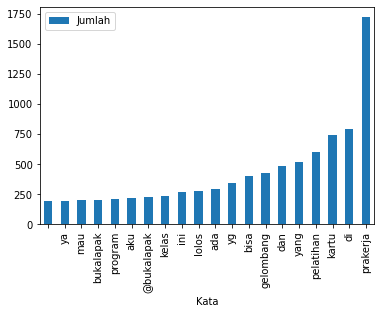

In [ ]:
top20_word.plot(kind='bar', x='Kata', y='Jumlah')
plt.savefig('top20kata.png', bbox_inches='tight')
plt.savefig('kemunculan_kata.jpg', bbox_inches='tight')
plt.show()

# Labelling Corpus

In [ ]:
#Muat Tweet Data Mentah
#df = pd.read_csv('stop_stemmed_tweets.csv')
df = pd.read_csv('gdrive/My Drive/PPL/prakerja/datanew/stop_stemmed_tweets.csv')

In [ ]:
df.head()

,Unnamed: 0,hashtags,lower,filter_txt,clean_token,clean_stop,freq_dist_token,stemm
0,0,@izonemfs kemarin dapet prakerja,@izonemfs kemarin dapet prakerja,izonemfs kemarin dapet,"['izonemfs', 'kemarin', 'dapet']","['izonemfs', 'kemarin', 'dapet']",<FreqDist with 3 samples and 3 outcomes>,"['izonemfs', 'kemarin', 'dapet']"
1,1,"@TokopediaCare Halo Kak,\nNama : Muhamad Surya...","@tokopediacare halo kak,\nnama : muhamad surya...",tokopediacare halo kak nama muhamad suryadi sy...,"['tokopediacare', 'halo', 'kak', 'nama', 'muha...","['tokopediacare', 'halo', 'kak', 'nama', 'muha...",<FreqDist with 25 samples and 25 outcomes>,"['tokopediacare', 'halo', 'kak', 'nama', 'muha..."
2,2,@Chepyzaenal68 Untuk melakukan pendaftaran aku...,@chepyzaenal68 untuk melakukan pendaftaran aku...,chepyzaenal untuk melakukan pendaftaran akun s...,"['chepyzaenal', 'untuk', 'melakukan', 'pendaft...","['chepyzaenal', 'pendaftaran', 'akun', 'silaka...",<FreqDist with 21 samples and 23 outcomes>,"['chepyzaenal', 'daftar', 'akun', 'sila', 'kun..."
3,3,@bukalapak the best lah bukalapak dan prakerja...,@bukalapak the best lah bukalapak dan prakerja...,bukalapak the best lah bukalapak dan dalam mem...,"['bukalapak', 'the', 'best', 'lah', 'bukalapak...","['bukalapak', 'the', 'best', 'bukalapak', 'mem...",<FreqDist with 8 samples and 9 outcomes>,"['bukalapak', 'the', 'best', 'bukalapak', 'ban..."
4,4,@bukalapak emang bukalapak paling bisa di anda...,@bukalapak emang bukalapak paling bisa di anda...,bukalapak emang bukalapak paling bisa di andal...,"['bukalapak', 'emang', 'bukalapak', 'paling', ...","['bukalapak', 'emang', 'bukalapak', 'andalkan'...",<FreqDist with 11 samples and 13 outcomes>,"['bukalapak', 'emang', 'bukalapak', 'andal', '..."


In [ ]:
# load positive word
positive = pd.read_csv('gdrive/My Drive/PPL/prakerja/ID-OpinionWords-master/positive.txt', header=None)
positive = positive[0].values.tolist()
positive = '|'.join(positive)
# load negative word
negative = pd.read_csv('gdrive/My Drive/PPL/prakerja/ID-OpinionWords-master/negative.txt', header=None)
negative = negative[0].values.tolist()
negative = '|'.join(negative)

In [ ]:
df['positive'] = [len(re.findall(positive, i.lower())) / len(i.split()) for i in df.stemm]


In [ ]:
df['negative'] = [len(re.findall(negative, i.lower())) / len(i.split()) for i in df.stemm]

In [ ]:
df.head(5)

,Unnamed: 0,hashtags,lower,filter_txt,clean_token,clean_stop,freq_dist_token,stemm,positive,negative
0,0,@izonemfs kemarin dapet prakerja,@izonemfs kemarin dapet prakerja,izonemfs kemarin dapet,"['izonemfs', 'kemarin', 'dapet']","['izonemfs', 'kemarin', 'dapet']",<FreqDist with 3 samples and 3 outcomes>,"['izonemfs', 'kemarin', 'dapet']",0.666667,0.000000
1,1,"@TokopediaCare Halo Kak,\nNama : Muhamad Surya...","@tokopediacare halo kak,\nnama : muhamad surya...",tokopediacare halo kak nama muhamad suryadi sy...,"['tokopediacare', 'halo', 'kak', 'nama', 'muha...","['tokopediacare', 'halo', 'kak', 'nama', 'muha...",<FreqDist with 25 samples and 25 outcomes>,"['tokopediacare', 'halo', 'kak', 'nama', 'muha...",0.863636,0.045455
2,2,@Chepyzaenal68 Untuk melakukan pendaftaran aku...,@chepyzaenal68 untuk melakukan pendaftaran aku...,chepyzaenal untuk melakukan pendaftaran akun s...,"['chepyzaenal', 'untuk', 'melakukan', 'pendaft...","['chepyzaenal', 'pendaftaran', 'akun', 'silaka...",<FreqDist with 21 samples and 23 outcomes>,"['chepyzaenal', 'daftar', 'akun', 'sila', 'kun...",0.666667,0.000000
3,3,@bukalapak the best lah bukalapak dan prakerja...,@bukalapak the best lah bukalapak dan prakerja...,bukalapak the best lah bukalapak dan dalam mem...,"['bukalapak', 'the', 'best', 'lah', 'bukalapak...","['bukalapak', 'the', 'best', 'bukalapak', 'mem...",<FreqDist with 8 samples and 9 outcomes>,"['bukalapak', 'the', 'best', 'bukalapak', 'ban...",1.833333,0.333333
4,4,@bukalapak emang bukalapak paling bisa di anda...,@bukalapak emang bukalapak paling bisa di anda...,bukalapak emang bukalapak paling bisa di andal...,"['bukalapak', 'emang', 'bukalapak', 'paling', ...","['bukalapak', 'emang', 'bukalapak', 'andalkan'...",<FreqDist with 11 samples and 13 outcomes>,"['bukalapak', 'emang', 'bukalapak', 'andal', '...",2.000000,0.428571


In [ ]:
df['sentimen'] = ['positive' if df.iloc[i].positive >= df.iloc[i].negative else 'negative' for i in range(df.shape[0])]

In [ ]:
df.head(5)

,Unnamed: 0,hashtags,lower,filter_txt,clean_token,clean_stop,freq_dist_token,stemm,positive,negative,sentimen
0,0,@izonemfs kemarin dapet prakerja,@izonemfs kemarin dapet prakerja,izonemfs kemarin dapet,"['izonemfs', 'kemarin', 'dapet']","['izonemfs', 'kemarin', 'dapet']",<FreqDist with 3 samples and 3 outcomes>,"['izonemfs', 'kemarin', 'dapet']",0.666667,0.000000,positive
1,1,"@TokopediaCare Halo Kak,\nNama : Muhamad Surya...","@tokopediacare halo kak,\nnama : muhamad surya...",tokopediacare halo kak nama muhamad suryadi sy...,"['tokopediacare', 'halo', 'kak', 'nama', 'muha...","['tokopediacare', 'halo', 'kak', 'nama', 'muha...",<FreqDist with 25 samples and 25 outcomes>,"['tokopediacare', 'halo', 'kak', 'nama', 'muha...",0.863636,0.045455,positive
2,2,@Chepyzaenal68 Untuk melakukan pendaftaran aku...,@chepyzaenal68 untuk melakukan pendaftaran aku...,chepyzaenal untuk melakukan pendaftaran akun s...,"['chepyzaenal', 'untuk', 'melakukan', 'pendaft...","['chepyzaenal', 'pendaftaran', 'akun', 'silaka...",<FreqDist with 21 samples and 23 outcomes>,"['chepyzaenal', 'daftar', 'akun', 'sila', 'kun...",0.666667,0.000000,positive
3,3,@bukalapak the best lah bukalapak dan prakerja...,@bukalapak the best lah bukalapak dan prakerja...,bukalapak the best lah bukalapak dan dalam mem...,"['bukalapak', 'the', 'best', 'lah', 'bukalapak...","['bukalapak', 'the', 'best', 'bukalapak', 'mem...",<FreqDist with 8 samples and 9 outcomes>,"['bukalapak', 'the', 'best', 'bukalapak', 'ban...",1.833333,0.333333,positive
4,4,@bukalapak emang bukalapak paling bisa di anda...,@bukalapak emang bukalapak paling bisa di anda...,bukalapak emang bukalapak paling bisa di andal...,"['bukalapak', 'emang', 'bukalapak', 'paling', ...","['bukalapak', 'emang', 'bukalapak', 'andalkan'...",<FreqDist with 11 samples and 13 outcomes>,"['bukalapak', 'emang', 'bukalapak', 'andal', '...",2.000000,0.428571,positive


## Grafik Labeling Corpus

In [ ]:
print('jumlah tweet positif : ', df[(df.sentimen == 'positive')].shape[0])
print('jumlah tweet negatif : ', df[(df.sentimen == 'negative')].shape[0])

jumlah tweet positif :  2261
jumlah tweet negatif :  10


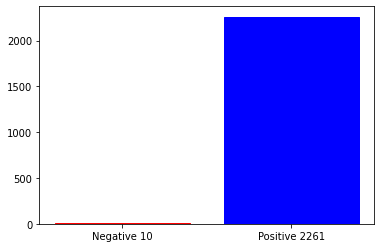

In [ ]:
import matplotlib.pyplot as plt

total_negative_tweets = df[(df.sentimen == 'negative')].shape[0]
total_positive_tweets = df[(df.sentimen == 'positive')].shape[0]
total_tweets = df.shape[0]

df_bar = pd.Series(data=[total_negative_tweets, total_positive_tweets],
               index=['Negative ' + str(total_negative_tweets), 
                      'Positive ' + str(total_positive_tweets)])

barnya = plt.bar(df_bar.index, df_bar.values)
barnya[0].set_color('#ff0000')
barnya[1].set_color('#0000ff')
plt.savefig('manual_label_bar.jpg')
plt.show()

(-1.101282931198081,
 1.1024325354106217,
 -1.206788404156171,
 1.1050851621026747)

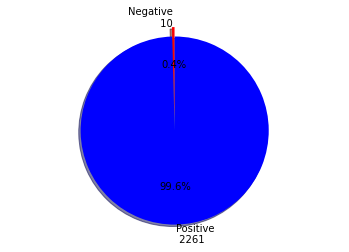

In [ ]:
fig1, ax1 = plt.subplots()
ax1.pie([total_negative_tweets/total_tweets, total_positive_tweets/total_tweets], 
        explode=[0, 0.1], labels=['Negative\n {}'.format(total_negative_tweets), 'Positive\n {}'.format(total_positive_tweets)], autopct='%1.1f%%',
        colors=['#ff0000', '#0000ff'], shadow=True, startangle=90)
plt.savefig('manual_label_pie.jpg')
ax1.axis('equal')

In [ ]:
#Save Manual labelling tweets in Google Drive as csv file.
df.to_csv('hasil_manual_labeling.csv', index=None)
!mv hasil_manual_labeling.csv /content/gdrive/My\ Drive/PPL/prakerja/datanew/hasil_manual_labeling.csv

# Bag of Word (BOW) Model

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

In [ ]:
df = pd.read_csv('gdrive/My Drive/PPL/prakerja/datanew/hasil_manual_labeling.csv', index_col = 0)
#df = pd.read_csv('hasil_manual_labeling.csv', index_col = 0)

In [ ]:
df['numbered_sentimen'] = [1 if i == 'positive' else 0 for i in df['sentimen']]

In [ ]:
df.head(10)

,hashtags,lower,filter_txt,clean_token,clean_stop,freq_dist_token,stemm,positive,negative,sentimen,numbered_sentimen
Unnamed: 0,,,,,,,,,,,
0,@izonemfs kemarin dapet prakerja,@izonemfs kemarin dapet prakerja,izonemfs kemarin dapet,"['izonemfs', 'kemarin', 'dapet']","['izonemfs', 'kemarin', 'dapet']",<FreqDist with 3 samples and 3 outcomes>,"['izonemfs', 'kemarin', 'dapet']",0.666667,0.000000,positive,1
1,"@TokopediaCare Halo Kak,\nNama : Muhamad Surya...","@tokopediacare halo kak,\nnama : muhamad surya...",tokopediacare halo kak nama muhamad suryadi sy...,"['tokopediacare', 'halo', 'kak', 'nama', 'muha...","['tokopediacare', 'halo', 'kak', 'nama', 'muha...",<FreqDist with 25 samples and 25 outcomes>,"['tokopediacare', 'halo', 'kak', 'nama', 'muha...",0.863636,0.045455,positive,1
2,@Chepyzaenal68 Untuk melakukan pendaftaran aku...,@chepyzaenal68 untuk melakukan pendaftaran aku...,chepyzaenal untuk melakukan pendaftaran akun s...,"['chepyzaenal', 'untuk', 'melakukan', 'pendaft...","['chepyzaenal', 'pendaftaran', 'akun', 'silaka...",<FreqDist with 21 samples and 23 outcomes>,"['chepyzaenal', 'daftar', 'akun', 'sila', 'kun...",0.666667,0.000000,positive,1
3,@bukalapak the best lah bukalapak dan prakerja...,@bukalapak the best lah bukalapak dan prakerja...,bukalapak the best lah bukalapak dan dalam mem...,"['bukalapak', 'the', 'best', 'lah', 'bukalapak...","['bukalapak', 'the', 'best', 'bukalapak', 'mem...",<FreqDist with 8 samples and 9 outcomes>,"['bukalapak', 'the', 'best', 'bukalapak', 'ban...",1.833333,0.333333,positive,1
4,@bukalapak emang bukalapak paling bisa di anda...,@bukalapak emang bukalapak paling bisa di anda...,bukalapak emang bukalapak paling bisa di andal...,"['bukalapak', 'emang', 'bukalapak', 'paling', ...","['bukalapak', 'emang', 'bukalapak', 'andalkan'...",<FreqDist with 11 samples and 13 outcomes>,"['bukalapak', 'emang', 'bukalapak', 'andal', '...",2.000000,0.428571,positive,1
5,"Nyelesein 1 pelatihan di prakerja. Lama sih, t...","nyelesein 1 pelatihan di prakerja. lama sih, t...",nyelesein pelatihan di lama sih tp pengin aku ...,"['nyelesein', 'pelatihan', 'di', 'lama', 'sih'...","['nyelesein', 'pelatihan', 'pengin', 'ikutin',...",<FreqDist with 18 samples and 18 outcomes>,"['nyelesein', 'latih', 'pengin', 'ikutin', 'et...",0.700000,0.300000,positive,1
6,@Jasa_Prakerja hai kakkk cek dm🤗🤗,@jasa_prakerja hai kakkk cek dm🤗🤗,jasa hai kakkk cek dm,"['jasa', 'hai', 'kakkk', 'cek', 'dm']","['jasa', 'hai', 'kakkk', 'cek', 'dm']",<FreqDist with 5 samples and 5 outcomes>,"['jasa', 'hai', 'kakkk', 'cek', 'dm']",0.800000,0.000000,positive,1
7,@bukalapak wah bisa nambah skill kerja lagi ni...,@bukalapak wah bisa nambah skill kerja lagi ni...,bukalapak wah bisa nambah skill kerja lagi nih...,"['bukalapak', 'wah', 'bisa', 'nambah', 'skill'...","['bukalapak', 'nambah', 'skill', 'kerja', 'pla...",<FreqDist with 10 samples and 12 outcomes>,"['bukalapak', 'nambah', 'skill', 'kerja', 'pla...",1.833333,0.500000,positive,1
8,Segera Daftar Pelatihan Kartu Prakerja Sebelum...,segera daftar pelatihan kartu prakerja sebelum...,segera daftar pelatihan sebelum akun diblokir ...,"['segera', 'daftar', 'pelatihan', 'sebelum', '...","['daftar', 'pelatihan', 'akun', 'diblokir', 'b...",<FreqDist with 8 samples and 8 outcomes>,"['daftar', 'latih', 'akun', 'blokir', 'bqjkngj...",0.800000,0.200000,positive,1


In [ ]:
bow_model = CountVectorizer(ngram_range=(1,2), min_df=0.0025)
bow_model.fit(df.stemm)
df_vect = pd.DataFrame(bow_model.transform(df.stemm).toarray(), columns=bow_model.get_feature_names())
print(df_vect.shape)
df_vect.head(5)

(2271, 1280)


,abis,academy,academy bukalapak,academy dapat,academy nilai,ad,ada,ada gelombang,adu,ah,ahli,ahli sdm,ahli sempat,ahli sertifikasi,airlangga,airlangga airlanggafokuspemulihanekonomi,airlangga hrt,airlanggafokuspemulihanekonomi,airlanggafokuspemulihanekonomi sb,airlanggatunjukankinerja,airlanggatunjukankinerja kisutib,aj,ajar,akademi,akademi klik,akibat,akibat pandemi,akses,aktif,akugatauu,akun,akun linkaja,akun nomor,akun pilih,akun sobat,akuu,al,al vmv,alam,alami,...,wbvvczjl,wcyhafimcp,wcyhafimcp digitalbisa,wdza,wdza ltdpm,web,web ggswscg,webinar,website,whbbjuxh,when,when ndul,wib,wirausaha,wirausahawan,wirausahawan kopi,wkwk,wkwkw,work,work guys,work maaf,worksfess,wujud,xixixi,yaa,yaaa,yahh,youtube,youtube ndul,yuk,yuk daftar,yuk ikut,yuk lolos,yuk unduh,yukk,yukk lolos,zcz,zlavr,zoom,zoom sertifikat
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
df.iloc[1].stemm

"['tokopediacare', 'halo', 'kak', 'nama', 'muhamad', 'suryadi', 'syahdoa', 'mail', 'addiefals', 'gmail', 'com', 'kode', 'voucher', 'blj', 'ygid', 'beli', 'cakap', 'mohon', 'update', 'dashboard', 'dlgr', 'gs']"

In [ ]:
print(bow_model.get_feature_names())

['abis', 'academy', 'academy bukalapak', 'academy dapat', 'academy nilai', 'ad', 'ada', 'ada gelombang', 'adu', 'ah', 'ahli', 'ahli sdm', 'ahli sempat', 'ahli sertifikasi', 'airlangga', 'airlangga airlanggafokuspemulihanekonomi', 'airlangga hrt', 'airlanggafokuspemulihanekonomi', 'airlanggafokuspemulihanekonomi sb', 'airlanggatunjukankinerja', 'airlanggatunjukankinerja kisutib', 'aj', 'ajar', 'akademi', 'akademi klik', 'akibat', 'akibat pandemi', 'akses', 'aktif', 'akugatauu', 'akun', 'akun linkaja', 'akun nomor', 'akun pilih', 'akun sobat', 'akuu', 'al', 'al vmv', 'alam', 'alami', 'alas', 'alhamdulillah', 'alhamdulillah lolos', 'allah', 'alumni', 'alumni udah', 'alur', 'alur dapetin', 'ambil', 'ambil kelas', 'ambil latih', 'an', 'anak', 'ancam', 'ancam cabut', 'and', 'aneh', 'anggar', 'anggur', 'antri', 'antri caci', 'anyway', 'aplikasi', 'aplikasi linkaja', 'arahin', 'arti', 'asa', 'asah', 'asah kelas', 'askrl', 'at', 'at skill', 'atas', 'avpa', 'avpa prancis', 'ayo', 'baca', 'bagi',

##Positive Negative - Vector

In [ ]:
df_vect['rate_positive_word'] = [i for i in df['positive']]
df_vect['rate_negative_word'] = [i for i in df['negative']]
df_vect.head()

,abis,academy,academy bikin,academy bukalapak,academy dapat,ad,ada,ada gelombang,adu,ah,ahli,ahli sdm,ahli sempat,ahli sertifikasi,airlangga,airlangga airlanggafokuspemulihanekonomi,airlangga hrt,airlanggafokuspemulihanekonomi,airlanggafokuspemulihanekonomi co,airlanggatunjukankinerja,airlanggatunjukankinerja co,aj,aja,ajar,akademi,akademi klik,akibat,akibat pandemi,akses,aktif,akugatauu,akun,akun linkaja,akun nomor,akun pilih,akun sobat,akuu,al,al vmv,alam,...,ya beli,ya bonus,ya co,ya info,ya kak,ya latih,ya pasti,yaa,yaaa,yah,yahh,yg,yg beli,yg caci,yg cerdas,yg co,yg daftar,yg dapet,yg hina,yg lolos,yg menang,yg mudah,yg saldo,yg tau,yg terima,yg udah,youtube,youtube ndul,yuk,yuk daftar,yuk lolos,yuk unduh,yukk,yukk lolos,zcz,zlavr,zoom,zoom sertifikat,rate_positive_word,rate_negative_word
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.666667,0.000000
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.826087,0.043478
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.588235,0.000000
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1.833333,0.333333
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1.875000,0.375000


# Bernoulli Naive Bayes Model Train


In [ ]:
from sklearn.naive_bayes import BernoulliNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sn

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(df_vect, df.numbered_sentimen, test_size=0.2,random_state=123)

In [ ]:
test_x = pd.DataFrame(x_test)
test_y = pd.DataFrame(y_test)
test_x.shape[0]

455

In [ ]:
#Buat model Bernoulli
model = BernoulliNB()

#Start Training
classifier = model.fit(x_train,y_train)

##Confusion Matrix Data Latih

In [ ]:
predict = classifier.predict(x_train)
(predict, y_train)
print(classification_report(predict, y_train))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         1
           1       1.00      1.00      1.00      1815

    accuracy                           0.99      1816
   macro avg       0.50      0.50      0.50      1816
weighted avg       1.00      0.99      1.00      1816



In [ ]:
#Confusion Matrix Training
cm_train = confusion_matrix(predict,y_train)
print(cm_train)

[[   0    1]
 [   9 1806]]


In [ ]:
accuracy = cm_train.trace()/cm_train.sum()
print (accuracy)
print(f"{(accuracy*100):3.2f}%")

0.9944933920704846
99.45%


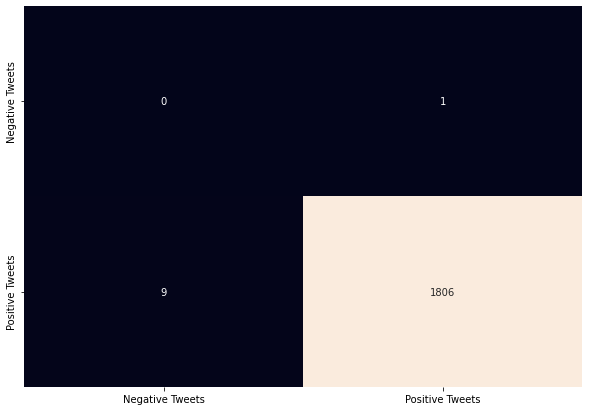

In [ ]:
df_cm_train = pd.DataFrame(cm_train, index = [i for i in ["Negative Tweets", "Positive Tweets"]],
columns = [i for i in ["Negative Tweets", "Positive Tweets"]])

plt.figure(figsize = (10,7))
sn.heatmap(df_cm_train, annot=True, cbar=False, fmt="d")
plt.savefig('confusion_matrix_train.jpg')

## Confusion Matrix Data Validasi

In [ ]:
predict = classifier.predict(x_test)
classification_report(predict, y_test)
print(classification_report(predict, y_test))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         2
           1       1.00      1.00      1.00       453

    accuracy                           0.99       455
   macro avg       0.50      0.50      0.50       455
weighted avg       0.99      0.99      0.99       455



In [ ]:
#Confusion Matrix Testing
cm = confusion_matrix(predict,y_test)
print(cm)


[[  0   2]
 [  1 452]]


In [ ]:
predict = classifier.predict(x_test)
classification_report(predict, y_test)
accuracy = cm.trace()/cm.sum()
print (accuracy)
print(f"{(accuracy*100):3.2f}%")

0.9934065934065934
99.34%


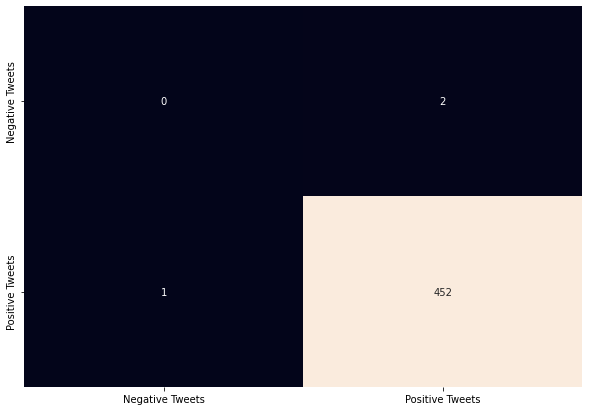

In [ ]:
df_cm = pd.DataFrame(cm, index = [i for i in ["Negative Tweets", "Positive Tweets"]],
columns = [i for i in ["Negative Tweets", "Positive Tweets"]])

plt.figure(figsize = (10,7))
sn.heatmap(df_cm, annot=True, cbar=False, fmt="d")
plt.savefig('confusion_matrix.jpg')

In [ ]:
rd_test = pd.DataFrame(columns = ["tweets","positive","negative","target","prediksi"])
rd_test.head()

,tweets,positive,negative,target,prediksi


In [ ]:
df.head(2)

,hashtags,lower,filter_txt,clean_token,clean_stop,freq_dist_token,stemm,positive,negative,sentimen,numbered_sentimen
Unnamed: 0,,,,,,,,,,,
0,@izonemfs kemarin dapet prakerja,@izonemfs kemarin dapet prakerja,izonemfs kemarin dapet,"['izonemfs', 'kemarin', 'dapet']","['izonemfs', 'kemarin', 'dapet']",<FreqDist with 3 samples and 3 outcomes>,"['izonemfs', 'kemarin', 'dapet']",0.666667,0.000000,positive,1
1,"@TokopediaCare Halo Kak,\nNama : Muhamad Surya...","@tokopediacare halo kak,\nnama : muhamad surya...",tokopediacare halo kak nama muhamad suryadi sy...,"['tokopediacare', 'halo', 'kak', 'nama', 'muha...","['tokopediacare', 'halo', 'kak', 'nama', 'muha...",<FreqDist with 25 samples and 25 outcomes>,"['tokopediacare', 'halo', 'kak', 'nama', 'muha...",0.863636,0.045455,positive,1


In [ ]:
i = 0
for val in test_x.index:
  rd_test.loc[i] = [df['stemm'].iloc[val],  df['positive'].iloc[val], df['negative'].iloc[val],df['numbered_sentimen'].iloc[val], predict[i]]
  i = i+1

In [ ]:
rd_test.head(5)

,tweets,positive,negative,target,prediksi
0,"['mayan', 'dp', 'laptop', 'gantiin', 'maling',...",1.000000,0.000000,1,1
1,"['solusi', 'sertifikat', 'muncul', 'dashboard'...",1.000000,0.100000,1,1
2,"['gais', 'gw', 'lolos', 'bingung', 'nyari', 'd...",0.285714,0.142857,1,1
3,"['jadwal', 'gelombang', 'gelombang', 'tambah',...",0.900000,0.200000,1,1
4,"['bencoolen', 'coffee', 'latih', 'ntuk', 'sert...",0.814815,0.111111,1,1


In [ ]:
# Export
rd_test.to_csv('perbandinganklasifikasi_web.csv')
!mv perbandinganklasifikasi_web.csv /content/gdrive/My\ Drive/PPL/prakerja/datanew/perbandinganklasifikasi_web.csv

In [ ]:
predict_counter = 0
for val in test_x.index:
  print('{}, {}, {}'.format(df['stemm'].iloc[val], df['numbered_sentimen'].iloc[val], predict[predict_counter]))
  predict_counter+=1
print(predict_counter)

['mayan', 'dp', 'laptop', 'gantiin', 'maling', 'kemaren'], 1, 1
['solusi', 'sertifikat', 'muncul', 'dashboard', 'salah', 'data', 'atas', 'hnkuakcc', 'nfte', 'wjdok'], 1, 1
['gais', 'gw', 'lolos', 'bingung', 'nyari', 'duit', 'gmn'], 1, 1
['jadwal', 'gelombang', 'gelombang', 'tambah', 'bocor', 'louisa', 'tuhatu', 'zyull', 'bae', 'wihbsucpxc'], 1, 1
['bencoolen', 'coffee', 'latih', 'ntuk', 'serta', 'gel', 'sbage', 'barista', 'wirausahawan', 'kopi', 'bencoolen', 'coffee', 'usaha', 'produk', 'kopi', 'menang', 'harga', 'avpa', 'prancis', 'orang', 'alumni', 'udah', 'latih', 'lho', 'qm', 'pfn', 'wbvvczjl'], 1, 1
['yuk', 'lolos', 'gelombang', 'bingung', 'latih', 'mana', 'rekomendasi', 'latih', 'cepat', 'mudah', 'bonus', 'pulsa', 'up', 'to', 'beli', 'more', 'info', 'dm', 'iqcdvoj'], 1, 1
['pasti', 'nomor', 'hp', 'registrasi', 'akun', 'nomor', 'telepon', 'wallet', 'daftar', 'akun', 'linkaja', 'upgrade', 'full', 'service', 'kyc'], 1, 1
['carrotaegi', 'halo', 'kak', 'selamat', 'malam', 'udah', 'lat

## Grafik Prediksi Model Bernoulli

In [ ]:
#Prediksi Bernoulli dengan BOW(df_vect)
result = model.predict(df_vect)

In [ ]:
print('jumlah positif : ', len([n for n in result if n == 1]))
print('jumlah negatif : ', len([n for n in result if n == 0]))

jumlah positif :  2268
jumlah negatif :  3


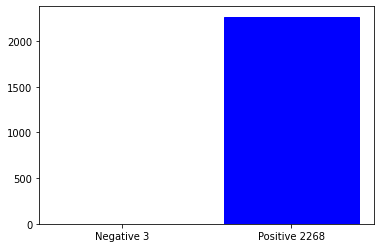

In [ ]:
#Barplot
model_total_neg = len([n for n in result if n == 0])
model_total_pos = len([n for n in result if n == 1])
model_total_tweets = model_total_neg + model_total_pos


model_df = pd.Series(data=[model_total_neg, model_total_pos],
               index=['Negative ' + str(model_total_neg), 
                      'Positive ' + str(model_total_pos)])

barnya = plt.bar(model_df.index, model_df.values)
barnya[0].set_color('#ff0000')
barnya[1].set_color('#0000ff')
plt.savefig('ai_label_bar.jpg')
plt.show()

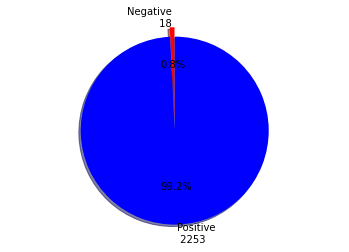

In [ ]:
#Piechart
fig1, ax1 = plt.subplots()
ax1.pie([model_total_neg/model_total_tweets, model_total_pos/model_total_tweets], 
        explode=[0, 0.1], labels=['Negative\n {}'.format(model_total_neg), 'Positive\n {}'.format(model_total_pos)], autopct='%1.1f%%',
        colors=['#ff0000', '#0000ff'], shadow=True, startangle=90)
ax1.axis('equal')
plt.savefig('ai_label_pie.jpg')

#Perbandingan Klasifikasi
Membandingan hasil klasifikasi secara manual dengan klasifikasi menggunakan Naive Bayes dengan model Bernoulli

In [ ]:
df['ai_predict'] = result
df['sentiment_ai'] = ['positive' if df.iloc[i].ai_predict == 1 else 'negative' for i in range(df.shape[0])]
df.head()

,hashtags,lower,clean_txt,filter_txt,clean_token,clean_stop,freq_dist_token,stemm,positive,negative,sentimen,numbered_sentimen,ai_predict,sentiment_ai
Unnamed: 0,,,,,,,,,,,,,,
0,@izonemfs kemarin dapet prakerja,@izonemfs kemarin dapet prakerja,izonemfs kemarin dapet,izonemfs kemarin dapet,"['izonemfs', 'kemarin', 'dapet']","['izonemfs', 'kemarin', 'dapet']",<FreqDist with 3 samples and 3 outcomes>,"['izonemfs', 'kemarin', 'dapet']",0.666667,0.000000,positive,1,1,positive
1,"@TokopediaCare Halo Kak,\nNama : Muhamad Surya...","@tokopediacare halo kak,\nnama : muhamad surya...",tokopediacare halo kak nama muhamad suryadi sy...,tokopediacare halo kak nama muhamad suryadi sy...,"['tokopediacare', 'halo', 'kak', 'nama', 'muha...","['tokopediacare', 'halo', 'kak', 'nama', 'muha...",<FreqDist with 25 samples and 25 outcomes>,"['tokopediacare', 'halo', 'kak', 'nama', 'muha...",0.826087,0.043478,positive,1,1,positive
2,@Chepyzaenal68 Untuk melakukan pendaftaran aku...,@chepyzaenal68 untuk melakukan pendaftaran aku...,chepyzaenal untuk melakukan pendaftaran akun s...,chepyzaenal untuk melakukan pendaftaran akun s...,"['chepyzaenal', 'untuk', 'melakukan', 'pendaft...","['chepyzaenal', 'pendaftaran', 'akun', 'silaka...",<FreqDist with 21 samples and 23 outcomes>,"['chepyzaenal', 'daftar', 'akun', 'sila', 'kun...",0.588235,0.000000,positive,1,1,positive
3,@bukalapak the best lah bukalapak dan prakerja...,@bukalapak the best lah bukalapak dan prakerja...,bukalapak the best lah bukalapak dan dalam mem...,bukalapak the best lah bukalapak dan dalam mem...,"['bukalapak', 'the', 'best', 'lah', 'bukalapak...","['bukalapak', 'the', 'best', 'bukalapak', 'mem...",<FreqDist with 8 samples and 9 outcomes>,"['bukalapak', 'the', 'best', 'bukalapak', 'ban...",1.833333,0.333333,positive,1,1,positive
4,@bukalapak emang bukalapak paling bisa di anda...,@bukalapak emang bukalapak paling bisa di anda...,bukalapak emang bukalapak paling bisa di andal...,bukalapak emang bukalapak paling bisa di andal...,"['bukalapak', 'emang', 'bukalapak', 'paling', ...","['bukalapak', 'emang', 'bukalapak', 'andalkan'...",<FreqDist with 11 samples and 13 outcomes>,"['bukalapak', 'emang', 'bukalapak', 'andal', '...",1.875000,0.375000,positive,1,1,positive


In [ ]:
df.to_csv('full_labelling.csv')
!mv full_labelling.csv /content/gdrive/My\ Drive/PPL/prakerja/datanew/full_labelling.csv

#Wordcloud

In [ ]:
from wordcloud import WordCloud, STOPWORDS
from PIL import Image
import urllib
import requests
import numpy as np

In [ ]:
try:
  del df_vect['rate_positive_word']
  del df_vect['rate_negative_word']
except:
  pass

In [ ]:
text = []
dict_text = {}

for x in df_vect.columns:
  text += [x] * sum(df_vect[x])

print(text)
text = '  '.join(text)

for x in df_vect.columns:
  dict_text[x] = (sum(df_vect[x]) / len(text)) / 100

['abis', 'abis', 'abis', 'abis', 'abis', 'abis', 'abis', 'abis', 'abis', 'abis', 'abis', 'academy', 'academy', 'academy', 'academy', 'academy', 'academy', 'academy', 'academy', 'academy', 'academy', 'academy', 'academy', 'academy', 'academy', 'academy', 'academy', 'academy', 'academy', 'academy', 'academy', 'academy', 'academy', 'academy', 'academy', 'academy', 'academy', 'academy', 'academy', 'academy', 'academy', 'academy', 'academy', 'academy', 'academy', 'academy', 'academy', 'academy', 'academy', 'academy', 'academy', 'academy', 'academy', 'academy', 'academy', 'academy', 'academy', 'academy', 'academy', 'academy', 'academy', 'academy', 'academy', 'academy', 'academy', 'academy', 'academy', 'academy', 'academy', 'academy', 'academy', 'academy', 'academy', 'academy', 'academy', 'academy', 'academy', 'academy', 'academy', 'academy', 'academy', 'academy', 'academy', 'academy', 'academy', 'academy', 'academy', 'academy', 'academy', 'academy', 'academy bikin', 'academy bikin', 'academy

In [ ]:
mask = np.array(Image.open(requests.get('https://e7.pngegg.com/pngimages/46/399/png-clipart-oval-shape-click-n-say-color-shape-monochrome-color.png', stream=True).raw))

In [ ]:
wordcloud = WordCloud(background_color='white', collocations=False, mask=mask, contour_width=3, contour_color='firebrick').generate(text)

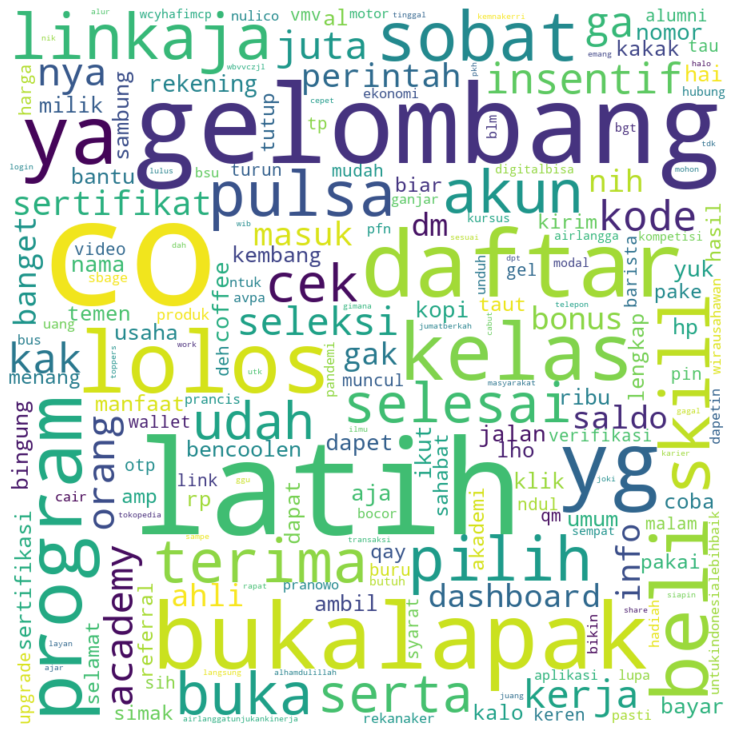

In [ ]:
plt.figure(figsize=[20,10])
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.tight_layout(pad=0)
plt.savefig('wordcloud.jpg')
plt.show()

# Bernoulli Predict
Menggunakan kalimat baru

In [ ]:
data_predict = [
'prakerja jelek jorok jijik asu anjing kere miskin tidak jelas korupsi pemulung',
'@ariefanticovid_ Program Kartu Prakerja Diklaim Sebagai Kegagalan 2 Tahun Jokowi-Maruf https://t.co/WMt1tzd6Em Jokowi Bapak Pembangunan',
'RT @detikcom: Program Kartu Prakerja gelombang 22 sudah dibuka mulai hari ini. Ini 4 fakta Kartu Prakerja yang harus diketahui. https://t.câ€',
'Program Kartu Prakerja Diklaim Sebagai Keberhasilan 2 Tahun Jokowi-Maruf. Mantap, Kita Apresiasi Keberhasilan Pemerintahan Presiden Jokowi https://t.co/9w3xJZiAFv Jokowi Bapak Pembangunan',
'Program Kartu Prakerja gelombang 22 sudah dibuka mulai hari ini. Ini 4 fakta Kartu Prakerja yang harus diketahui. https://t.co/7sLaStxqdM',
'RT @negativisme: Kebijakan PPKM awalnya dinyinyirin dianggap gak guna, endingnya malah diakui dunia, begitupun kartu prakerja https://t.co/â€',
'RT @kompascom: Peserta gagal segera mendaftarkan diri melalui https://t.co/WIuLWtb2or. Bagaimana caranya? https://t.co/NjF2X9G7gv',
'dapet prakerja dari pemerintah. makasih yah pak duitnya saya pake gacha',
'prakerja jelek jorok jijik asu anjing kere miskin tidak jelas korupsi',
'Gelombang 22Â Kartu PrakerjaÂ telah dibuka! Selengkapnya baca di -&gt #PrakerjaGelombang22Dibuka? #AdaApaHariIni https://t.co/fy11g89tyF',
'Prakerja Gelombang 22 Telah Dibuka, Ini Tips Agar Lolos Seleksi - Prasasti Jabar - https://t.co/1cBM3ozebV https://t.co/e2Suxwr4X4',
'Masuk di Link https://t.co/zXnMV2jvLU Untuk Daftar Kartu Prakerja Gelombang 22 https://t.co/VBYJUd3zRo',
'prakerja jelek jorok jijik asu anjing kere miskin tidak jelas korupsi',
'@KemnakerRI @RessaIsMe Saya ikut prakerja gel.7 trs dpt pemberitahuan dari kemnaker kalau BSU telah di salurkan ke bank BNI. Apakah bisa di ambil atau tdk ?',
'Pendaftaran Kartu Prakerja Gelombang 22 di https://t.co/fs1WO6bNju, Kuota Terbatas, Ini Cara dan Syaratnya https://t.co/wnaANKFCB4 via @tribunnews',
'Yuk Daftar, Kartu Prakerja Gelombang 22 Sudah Dibuka, Ini Cara Daftarnya https://t.co/hwY0vquht7',
'prakerja jelek jorok jijik asu anjing kere miskin tidak jelas korupsi',
'@DukcapilKDN halo kak. Maaf mau tanya, saya sedang mencoba untuk daftar kartu prakerja namun terkendala pada nomor KK yang salah, padahal sudah sesuai dgn KK yang ada. Apakah ada cara untuk cek nomor KK scr online?',
'Bocoran Kuota Prakerja Gelombang 22, Segera Daftar Sebelum Terlambat #terkiniid #terkinidotid #makassarterkiniid #makassarterkinidotid #prakerja https://t.co/dMn3lPmUO8',
'Kartu Prakerja Gelombang 22 Dibuka, Ikuti seleksinya melalui situs Ini https://t.co/fvdJATzeOc https://t.co/SwyLDpQBLe',
'prakerja jelek jorok jijik asu anjing kere miskin tidak jelas korupsi',
'Peserta bisa segera mendaftarkan diri melalui https://t.co/WIuLWtb2or. Bagaimana caranya? https://t.co/NjF2X9G7gv',
'RT @idxchannelcom: Kabar gembira! Kartu Prakerja gelombang 22 sudah dibuka lagi #KartuPrakerja https://t.co/MgHF8VG0gx',
'Program Kartu Prakerja Diklaim Sebagai Keberhasilan 2 Tahun Jokowi-Maruf https://t.co/lbkJKw2c5v Jokowi Bapak Pembangunan',
'Simak! Persyaratan Daftar Kartu Prakerja Gelombang 22 https://t.co/ukcBbK9xmC',
'prakerja jelek jorok jijik asu anjing kere miskin tidak jelas korupsi',
'Berikut berita terpopuler di laman Tren, mulai dari pendaftaran Kartu Prakerja Gelombang 22 hingga soal cara mengecek pengumuman hasil SKD CPNS 2021. https://t.co/9sD48CVCZH',
'Gelombang 22 Kartu Prakerja telah dibuka! ã…¤ã…¤ Kunjungi situs resmi di https://t.co/truL3AkCqE untuk membuat akun dan mengikuti seleksi Kartu Prakerja. #SiapDariSekarang Yang belum pernah mendaftar sama sekali dan pingin dibantu https://t.co/qUOIQdcxWC #SiapDariSekarang https://t.co/hzEw2WGqnJ',
'@fadlizon Perlu diadakn audit pak untuk hal ini. Trmasuk audit utk seluruh proyek2 infrastruktur Pemerintah, audit Bansos, audit Utang Negara, audit Progrm Prakerja dll',
'Gelombang 22 Kartu Prakerja Telah Dibuka! Buruan Daftar Daripada Gagal lagi #Sindonews #BukanBeritaBiasa .https://t.co/A2iCrsL08Q',
]

In [ ]:
#BIkin dataframe tweets baru dengan nama df_pred
df_pred = pd.DataFrame(data_predict, columns = ['tweets'])

In [ ]:
df_pred.head()

,tweets
0,prakerja jelek jorok jijik asu anjing kere mis...
1,@ariefanticovid_ Program Kartu Prakerja Diklai...
2,RT @detikcom: Program Kartu Prakerja gelombang...
3,Program Kartu Prakerja Diklaim Sebagai Keberha...
4,Program Kartu Prakerja gelombang 22 sudah dibu...


In [ ]:
df_pred['content_clean'] = [clean_content(n) for n in tqdm(df_pred.tweets)]

not_null_row = [i for i in df_pred.index if len(df_pred.loc[i]['content_clean']) > 0]
df_pred = df_pred.loc[not_null_row]
print(df_pred.shape)
df_pred.head(5)

100%|██████████| 30/30 [00:00<00:00, 8197.34it/s]

(30, 2)


,tweets,content_clean
0,prakerja jelek jorok jijik asu anjing kere mis...,jelek jorok jijik asu anjing kere miskin tidak...
1,@ariefanticovid_ Program Kartu Prakerja Diklai...,ariefanticovid rogram artu rakerja iklaim ebag...
2,RT @detikcom: Program Kartu Prakerja gelombang...,detikcom rogram artu rakerja gelombang sudah d...
3,Program Kartu Prakerja Diklaim Sebagai Keberha...,rogram artu rakerja iklaim ebagai eberhasilan ...
4,Program Kartu Prakerja gelombang 22 sudah dibu...,rogram artu rakerja gelombang sudah dibuka mul...


In [ ]:
# load positive word
positive = pd.read_csv('gdrive/My Drive/PPL/prakerja/ID-OpinionWords-master/positive.txt', header=None)
positive = positive[0].values.tolist()
positive = '|'.join(positive)
# load negative word
negative = pd.read_csv('gdrive/My Drive/PPL/prakerja/ID-OpinionWords-master/negative.txt', header=None)
negative = negative[0].values.tolist()
negative = '|'.join(negative)

In [ ]:
df_pred['positive'] = [len(re.findall(positive, i.lower())) / len(i.split()) for i in df_pred.content_clean]
df_pred['negative'] = [len(re.findall(negative, i.lower())) / len(i.split()) for i in df_pred.content_clean]

In [ ]:
df_pred.head()

,tweets,content_clean,positive,negative
0,prakerja jelek jorok jijik asu anjing kere mis...,jelek jorok jijik asu anjing kere miskin tidak...,0.454545,0.727273
1,@ariefanticovid_ Program Kartu Prakerja Diklai...,ariefanticovid rogram artu rakerja iklaim ebag...,1.000000,0.111111
2,RT @detikcom: Program Kartu Prakerja gelombang...,detikcom rogram artu rakerja gelombang sudah d...,0.894737,0.000000
3,Program Kartu Prakerja Diklaim Sebagai Keberha...,rogram artu rakerja iklaim ebagai eberhasilan ...,0.920000,0.040000
4,Program Kartu Prakerja gelombang 22 sudah dibu...,rogram artu rakerja gelombang sudah dibuka mul...,0.857143,0.000000


In [ ]:
df_pred['sentimen'] = [1 if df_pred.iloc[i].positive >= df_pred.iloc[i].negative else 0 for i in range(df_pred.shape[0])]

In [ ]:
df_pred.head(30)

,tweets,content_clean,positive,negative,sentimen
0,prakerja jelek jorok jijik asu anjing kere mis...,jelek jorok jijik asu anjing kere miskin tidak...,0.454545,0.727273,0
1,@ariefanticovid_ Program Kartu Prakerja Diklai...,ariefanticovid rogram artu rakerja iklaim ebag...,1.000000,0.111111,1
2,RT @detikcom: Program Kartu Prakerja gelombang...,detikcom rogram artu rakerja gelombang sudah d...,0.894737,0.000000,1
3,Program Kartu Prakerja Diklaim Sebagai Keberha...,rogram artu rakerja iklaim ebagai eberhasilan ...,0.920000,0.040000,1
4,Program Kartu Prakerja gelombang 22 sudah dibu...,rogram artu rakerja gelombang sudah dibuka mul...,0.857143,0.000000,1
5,RT @negativisme: Kebijakan PPKM awalnya dinyin...,negativisme ebijakan awalnya dinyinyirin diang...,1.142857,0.071429,1
6,RT @kompascom: Peserta gagal segera mendaftark...,kompascom eserta gagal segera mendaftarkan dir...,0.944444,0.222222,1
7,dapet prakerja dari pemerintah. makasih yah pa...,dapet dari pemerintah makasih yah pak duitnya ...,1.300000,0.100000,1
8,prakerja jelek jorok jijik asu anjing kere mis...,jelek jorok jijik asu anjing kere miskin tidak...,0.400000,0.800000,0
9,Gelombang 22Â Kartu PrakerjaÂ telah dibuka! Se...,elombang artu rakerja telah dibuka elengkapnya...,0.809524,0.047619,1


In [ ]:
df_pred_vect = pd.DataFrame(bow_model.transform(df_pred['content_clean']).toarray(), columns=bow_model.get_feature_names())
df_pred_vect['rate_positive_word'] = [len(re.findall(positive, i.lower())) / len(i.split()) for i in df_pred.content_clean]
df_pred_vect['rate_negative_word'] = [len(re.findall(negative, i.lower())) / len(i.split()) for i in df_pred.content_clean]
df_pred_vect.head(5)

,abis,academy,academy bikin,academy bukalapak,academy dapat,ad,ada,ada gelombang,adu,ah,ahli,ahli sdm,ahli sempat,ahli sertifikasi,airlangga,airlangga airlanggafokuspemulihanekonomi,airlangga hrt,airlanggafokuspemulihanekonomi,airlanggafokuspemulihanekonomi co,airlanggatunjukankinerja,airlanggatunjukankinerja co,aj,aja,ajar,akademi,akademi klik,akibat,akibat pandemi,akses,aktif,akugatauu,akun,akun linkaja,akun nomor,akun pilih,akun sobat,akuu,al,al vmv,alam,...,ya beli,ya bonus,ya co,ya info,ya kak,ya latih,ya pasti,yaa,yaaa,yah,yahh,yg,yg beli,yg caci,yg cerdas,yg co,yg daftar,yg dapet,yg hina,yg lolos,yg menang,yg mudah,yg saldo,yg tau,yg terima,yg udah,youtube,youtube ndul,yuk,yuk daftar,yuk lolos,yuk unduh,yukk,yukk lolos,zcz,zlavr,zoom,zoom sertifikat,rate_positive_word,rate_negative_word
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.454545,0.727273
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1.000000,0.111111
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.894737,0.000000
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.920000,0.040000
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.857143,0.000000


In [ ]:
result_pred = model.predict(df_pred_vect)

In [ ]:
df_pred['prediksi'] = result_pred

In [ ]:
df_pred.head(30)

,tweets,content_clean,positive,negative,sentimen,prediksi
0,prakerja jelek jorok jijik asu anjing kere mis...,jelek jorok jijik asu anjing kere miskin tidak...,0.454545,0.727273,0,1
1,@ariefanticovid_ Program Kartu Prakerja Diklai...,ariefanticovid rogram artu rakerja iklaim ebag...,1.000000,0.111111,1,1
2,RT @detikcom: Program Kartu Prakerja gelombang...,detikcom rogram artu rakerja gelombang sudah d...,0.894737,0.000000,1,1
3,Program Kartu Prakerja Diklaim Sebagai Keberha...,rogram artu rakerja iklaim ebagai eberhasilan ...,0.920000,0.040000,1,1
4,Program Kartu Prakerja gelombang 22 sudah dibu...,rogram artu rakerja gelombang sudah dibuka mul...,0.857143,0.000000,1,1
5,RT @negativisme: Kebijakan PPKM awalnya dinyin...,negativisme ebijakan awalnya dinyinyirin diang...,1.142857,0.071429,1,1
6,RT @kompascom: Peserta gagal segera mendaftark...,kompascom eserta gagal segera mendaftarkan dir...,0.944444,0.222222,1,1
7,dapet prakerja dari pemerintah. makasih yah pa...,dapet dari pemerintah makasih yah pak duitnya ...,1.300000,0.100000,1,1
8,prakerja jelek jorok jijik asu anjing kere mis...,jelek jorok jijik asu anjing kere miskin tidak...,0.400000,0.800000,0,1
9,Gelombang 22Â Kartu PrakerjaÂ telah dibuka! Se...,elombang artu rakerja telah dibuka elengkapnya...,0.809524,0.047619,1,1


In [ ]:
print('jumlah positif : ', len([n for n in result_pred if n == 1]))
print('jumlah negatif : ', len([n for n in result_pred if n == 0]))

jumlah positif :  30
jumlah negatif :  0


In [ ]:
df_pred.to_csv('predict.csv', index=None)
!mv predict.csv /content/gdrive/My\ Drive/PPL/prakerja/datanew/predict.csv

In [ ]:
# df_sentimen['sentimen'] = pred_sentimen

In [ ]:
model.predict_proba(df_pred_vect)

array([[1.32419389e-50, 1.00000000e+00],
       [2.86855061e-52, 1.00000000e+00],
       [7.85196775e-50, 1.00000000e+00],
       [2.86855061e-52, 1.00000000e+00],
       [3.09090327e-50, 1.00000000e+00],
       [2.03639428e-49, 1.00000000e+00],
       [3.05763329e-50, 1.00000000e+00],
       [1.11733229e-48, 1.00000000e+00],
       [1.32419389e-50, 1.00000000e+00],
       [3.32883542e-48, 1.00000000e+00],
       [1.34438552e-51, 1.00000000e+00],
       [3.80912783e-52, 1.00000000e+00],
       [1.32419389e-50, 1.00000000e+00],
       [7.02746813e-47, 1.00000000e+00],
       [1.28759062e-50, 1.00000000e+00],
       [1.67427169e-51, 1.00000000e+00],
       [1.32419389e-50, 1.00000000e+00],
       [6.04734690e-45, 1.00000000e+00],
       [2.86855061e-52, 1.00000000e+00],
       [3.67057986e-50, 1.00000000e+00],
       [1.32419389e-50, 1.00000000e+00],
       [5.86748989e-51, 1.00000000e+00],
       [8.48112657e-52, 1.00000000e+00],
       [2.86855061e-52, 1.00000000e+00],
       [4.923942

In [ ]:
print(classification_report(df_pred['sentimen'], result_pred ))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         6
           1       0.80      1.00      0.89        24

    accuracy                           0.80        30
   macro avg       0.40      0.50      0.44        30
weighted avg       0.64      0.80      0.71        30



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
#Confusion Matrix Testing
cm_pred = confusion_matrix(df_pred['sentimen'], result_pred)
print(cm_pred)

[[ 0  6]
 [ 0 24]]


In [ ]:
accuracy = cm_pred.trace()/cm_pred.sum()
print (accuracy)
print(f"{(accuracy*100):3.2f}%")

0.8
80.00%


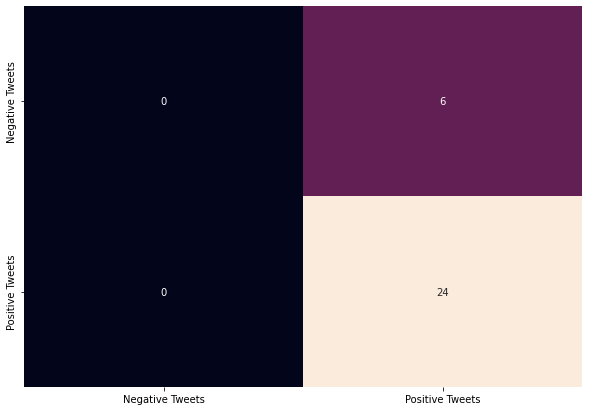

In [ ]:
df_cm_pred = pd.DataFrame(cm_pred, index = [i for i in ["Negative Tweets", "Positive Tweets"]],
columns = [i for i in ["Negative Tweets", "Positive Tweets"]])

plt.figure(figsize = (10,7))
sn.heatmap(df_cm_pred, annot=True, cbar=False, fmt="d")
plt.savefig('confusion_matrix_ujicoba.jpg')

##Visualisasi Bernoulli Predict di Web

In [ ]:
df_pred = pd.read_csv('gdrive/My Drive/PPL/prakerja/datanew/predict.csv', index_col=0)

In [ ]:
 df_pred['sentimen'] = df_pred['prediksi']
 df_pred.head(20)

,positive,negative,sentimen,prediksi
content_clean,,,,
jelek jorok jijik asu anjing kere miskin tidak jelas korupsi pemulung,0.454545,0.727273,1,1
ariefanticovid rogram artu rakerja iklaim ebagai egagalan ahun okowi aruf t co t tzd m okowi apak embangunan,1.000000,0.111111,1,1
detikcom rogram artu rakerja gelombang sudah dibuka mulai hari ini ni fakta artu rakerja yang harus diketahui t c,0.894737,0.000000,1,1
rogram artu rakerja iklaim ebagai eberhasilan ahun okowi aruf antap ita presiasi eberhasilan emerintahan residen okowi t co w x i v okowi apak embangunan,0.920000,0.040000,1,1
rogram artu rakerja gelombang sudah dibuka mulai hari ini ni fakta artu rakerja yang harus diketahui t co s a txqd,0.857143,0.000000,1,1
negativisme ebijakan awalnya dinyinyirin dianggap gak guna endingnya malah diakui dunia begitupun t co,1.142857,0.071429,1,1
kompascom eserta gagal segera mendaftarkan diri melalui t co u tb or agaimana caranya t co j gv,0.944444,0.222222,1,1
dapet dari pemerintah makasih yah pak duitnya saya pake gacha,1.300000,0.100000,1,1
jelek jorok jijik asu anjing kere miskin tidak jelas korupsi,0.400000,0.800000,1,1


In [ ]:
df_pred['sentimen'] = ['positive' if i == 1 else 'negative' for i in df_pred['sentimen']]
df_pred['prediksi'] = ['positive' if i == 1 else 'negative' for i in df_pred['prediksi']]
df_pred.head(20)

,positive,negative,sentimen,prediksi
content_clean,,,,
jelek jorok jijik asu anjing kere miskin tidak jelas korupsi pemulung,0.454545,0.727273,positive,positive
ariefanticovid rogram artu rakerja iklaim ebagai egagalan ahun okowi aruf t co t tzd m okowi apak embangunan,1.000000,0.111111,positive,positive
detikcom rogram artu rakerja gelombang sudah dibuka mulai hari ini ni fakta artu rakerja yang harus diketahui t c,0.894737,0.000000,positive,positive
rogram artu rakerja iklaim ebagai eberhasilan ahun okowi aruf antap ita presiasi eberhasilan emerintahan residen okowi t co w x i v okowi apak embangunan,0.920000,0.040000,positive,positive
rogram artu rakerja gelombang sudah dibuka mulai hari ini ni fakta artu rakerja yang harus diketahui t co s a txqd,0.857143,0.000000,positive,positive
negativisme ebijakan awalnya dinyinyirin dianggap gak guna endingnya malah diakui dunia begitupun t co,1.142857,0.071429,positive,positive
kompascom eserta gagal segera mendaftarkan diri melalui t co u tb or agaimana caranya t co j gv,0.944444,0.222222,positive,positive
dapet dari pemerintah makasih yah pak duitnya saya pake gacha,1.300000,0.100000,positive,positive
jelek jorok jijik asu anjing kere miskin tidak jelas korupsi,0.400000,0.800000,positive,positive


In [ ]:
df_pred.to_csv('bernoulliweb.csv')
!mv bernoulliweb.csv /content/gdrive/My\ Drive/PPL/prakerja/datanew/bernoulliweb.csv

#Visualisasi Web

In [ ]:
#Raw Data
df = pd.read_csv('gdrive/My Drive/PPL/prakerja/datanew/data_comut.csv')

#Casefolding
#df['casefolding'] = pd.read_csv('casefolding_tweets.csv')
#df['filtering'] = pd.read_csv('preprocess_done.csv') 
df.head()


,Unnamed: 0,hashtags
0,0,@izonemfs kemarin dapet prakerja
1,1,"@TokopediaCare Halo Kak,\nNama : Muhamad Surya..."
2,2,@Chepyzaenal68 Untuk melakukan pendaftaran aku...
3,3,@bukalapak the best lah bukalapak dan prakerja...
4,4,@bukalapak emang bukalapak paling bisa di anda...


In [ ]:
#df.to_csv('preprocess.csv', index=None)